In [75]:
library(readxl)
library(ggplot2)
library("FactoMineR")
library(tidyverse) #data Manipulation
library(cluster) #Clustering algorithms
library(factoextra)#Clustering Algorithms & Visualization
library(gridExtra)
#install.packages("dendextend")
#install.packages("ggplot2")
#install.packages("rlang")
library(dendextend) # For fancy deprograms
library(rlang) # clustering cutting
library("np") #npreg: you may need to install it
library(PerformanceAnalytics)
library(psych)
#install.packages('fmsb')
library(fmsb) #For Spider Plots
#install.packages('countrycode')
library(countrycode)
#install.packages(c('hrbrthemes','viridis'))
#library(hrbrthemes)
#library(viridis)
#install.packages('GGally')
library(GGally)
library(dplyr)
library(ggmap)
library(leaflet)
library(htmltools)

library(dplyr) #getMap()
library(rgeos)
#install.packages('rworldmap')
library(rworldmap) #joinCountryData2Map
library(grid)
library(tidyr)
#install.packages(c("cowplot", "googleway", "ggplot2", "ggrepel", "ggspatial", "sf", "rnaturalearth", "rnaturalearthdata"))
library("sf")
library("rnaturalearth")
library("rnaturalearthdata")
#install.packages('writexl')
library(writexl)

In [76]:
df.water.access <- read_excel("../../results/df-water-access.xlsx",sheet=1)
dfsimple <- read_excel("../../results/dfsimple.xlsx",sheet=1)
df.wa <- df.water.access[,c(1:23)]

   Country               imws            phom             pipy      
 Length:78          Min.   : 0.00   Min.   : 0.000   Min.   : 0.00  
 Class :character   1st Qu.:71.25   1st Qu.: 2.625   1st Qu.: 3.15  
 Mode  :character   Median :80.75   Median : 8.850   Median : 6.35  
                    Mean   :78.95   Mean   :19.427   Mean   :11.03  
                    3rd Qu.:92.35   3rd Qu.:25.775   3rd Qu.:17.35  
                    Max.   :99.90   Max.   :90.600   Max.   :54.10  
      ptap             bore             pwel             pspr       
 Min.   : 0.000   Min.   : 0.000   Min.   : 0.000   Min.   : 0.000  
 1st Qu.: 2.775   1st Qu.: 0.225   1st Qu.: 0.525   1st Qu.: 0.000  
 Median :10.300   Median : 3.900   Median : 3.950   Median : 0.550  
 Mean   :11.755   Mean   :12.571   Mean   : 6.314   Mean   : 3.128  
 3rd Qu.:17.675   3rd Qu.:19.925   3rd Qu.: 8.825   3rd Qu.: 3.675  
 Max.   :57.700   Max.   :86.400   Max.   :48.100   Max.   :47.900  
      rain             uiws       

Country,imws,phom,pipy,ptap,bore,pwel,pspr,rain,uiws,...,ctan,bott,othw,surw,tles,tmor,watp,iwsp,basw,liws
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,71.2,2.3,4.8,14.2,20.1,18.5,4.7,0.4,28.7,...,4.4,0.2,1.7,7.3,45.2,8.2,45.3,35.4,65.3,5.0
Albania,98.4,48.8,5.2,2.4,1.4,4.1,2.5,0.0,1.6,...,0.2,19.6,0.1,0.0,20.6,1.1,77.9,77.0,97.0,0.9
Angola,66.9,4.3,9.7,10.3,1.9,9.1,3.3,1.7,33.1,...,4.3,1.2,1.8,18.0,46.1,15.6,34.5,32.6,57.0,7.5
Armenia,99.9,88.3,8.0,0.5,0.2,0.2,1.0,0.0,0.1,...,0.0,0.0,0.0,0.0,1.6,0.1,97.6,97.6,99.1,0.1
Azerbaijan,90.6,34.0,19.7,3.5,9.3,6.2,7.5,0.0,9.4,...,0.7,0.1,1.1,7.0,18.7,4.4,75.9,71.2,86.4,3.4
Bangladesh,97.8,4.3,3.3,2.7,86.4,0.2,0.0,0.4,2.2,...,0.1,0.3,0.1,1.2,22.7,1.6,75.5,75.1,96.4,1.3


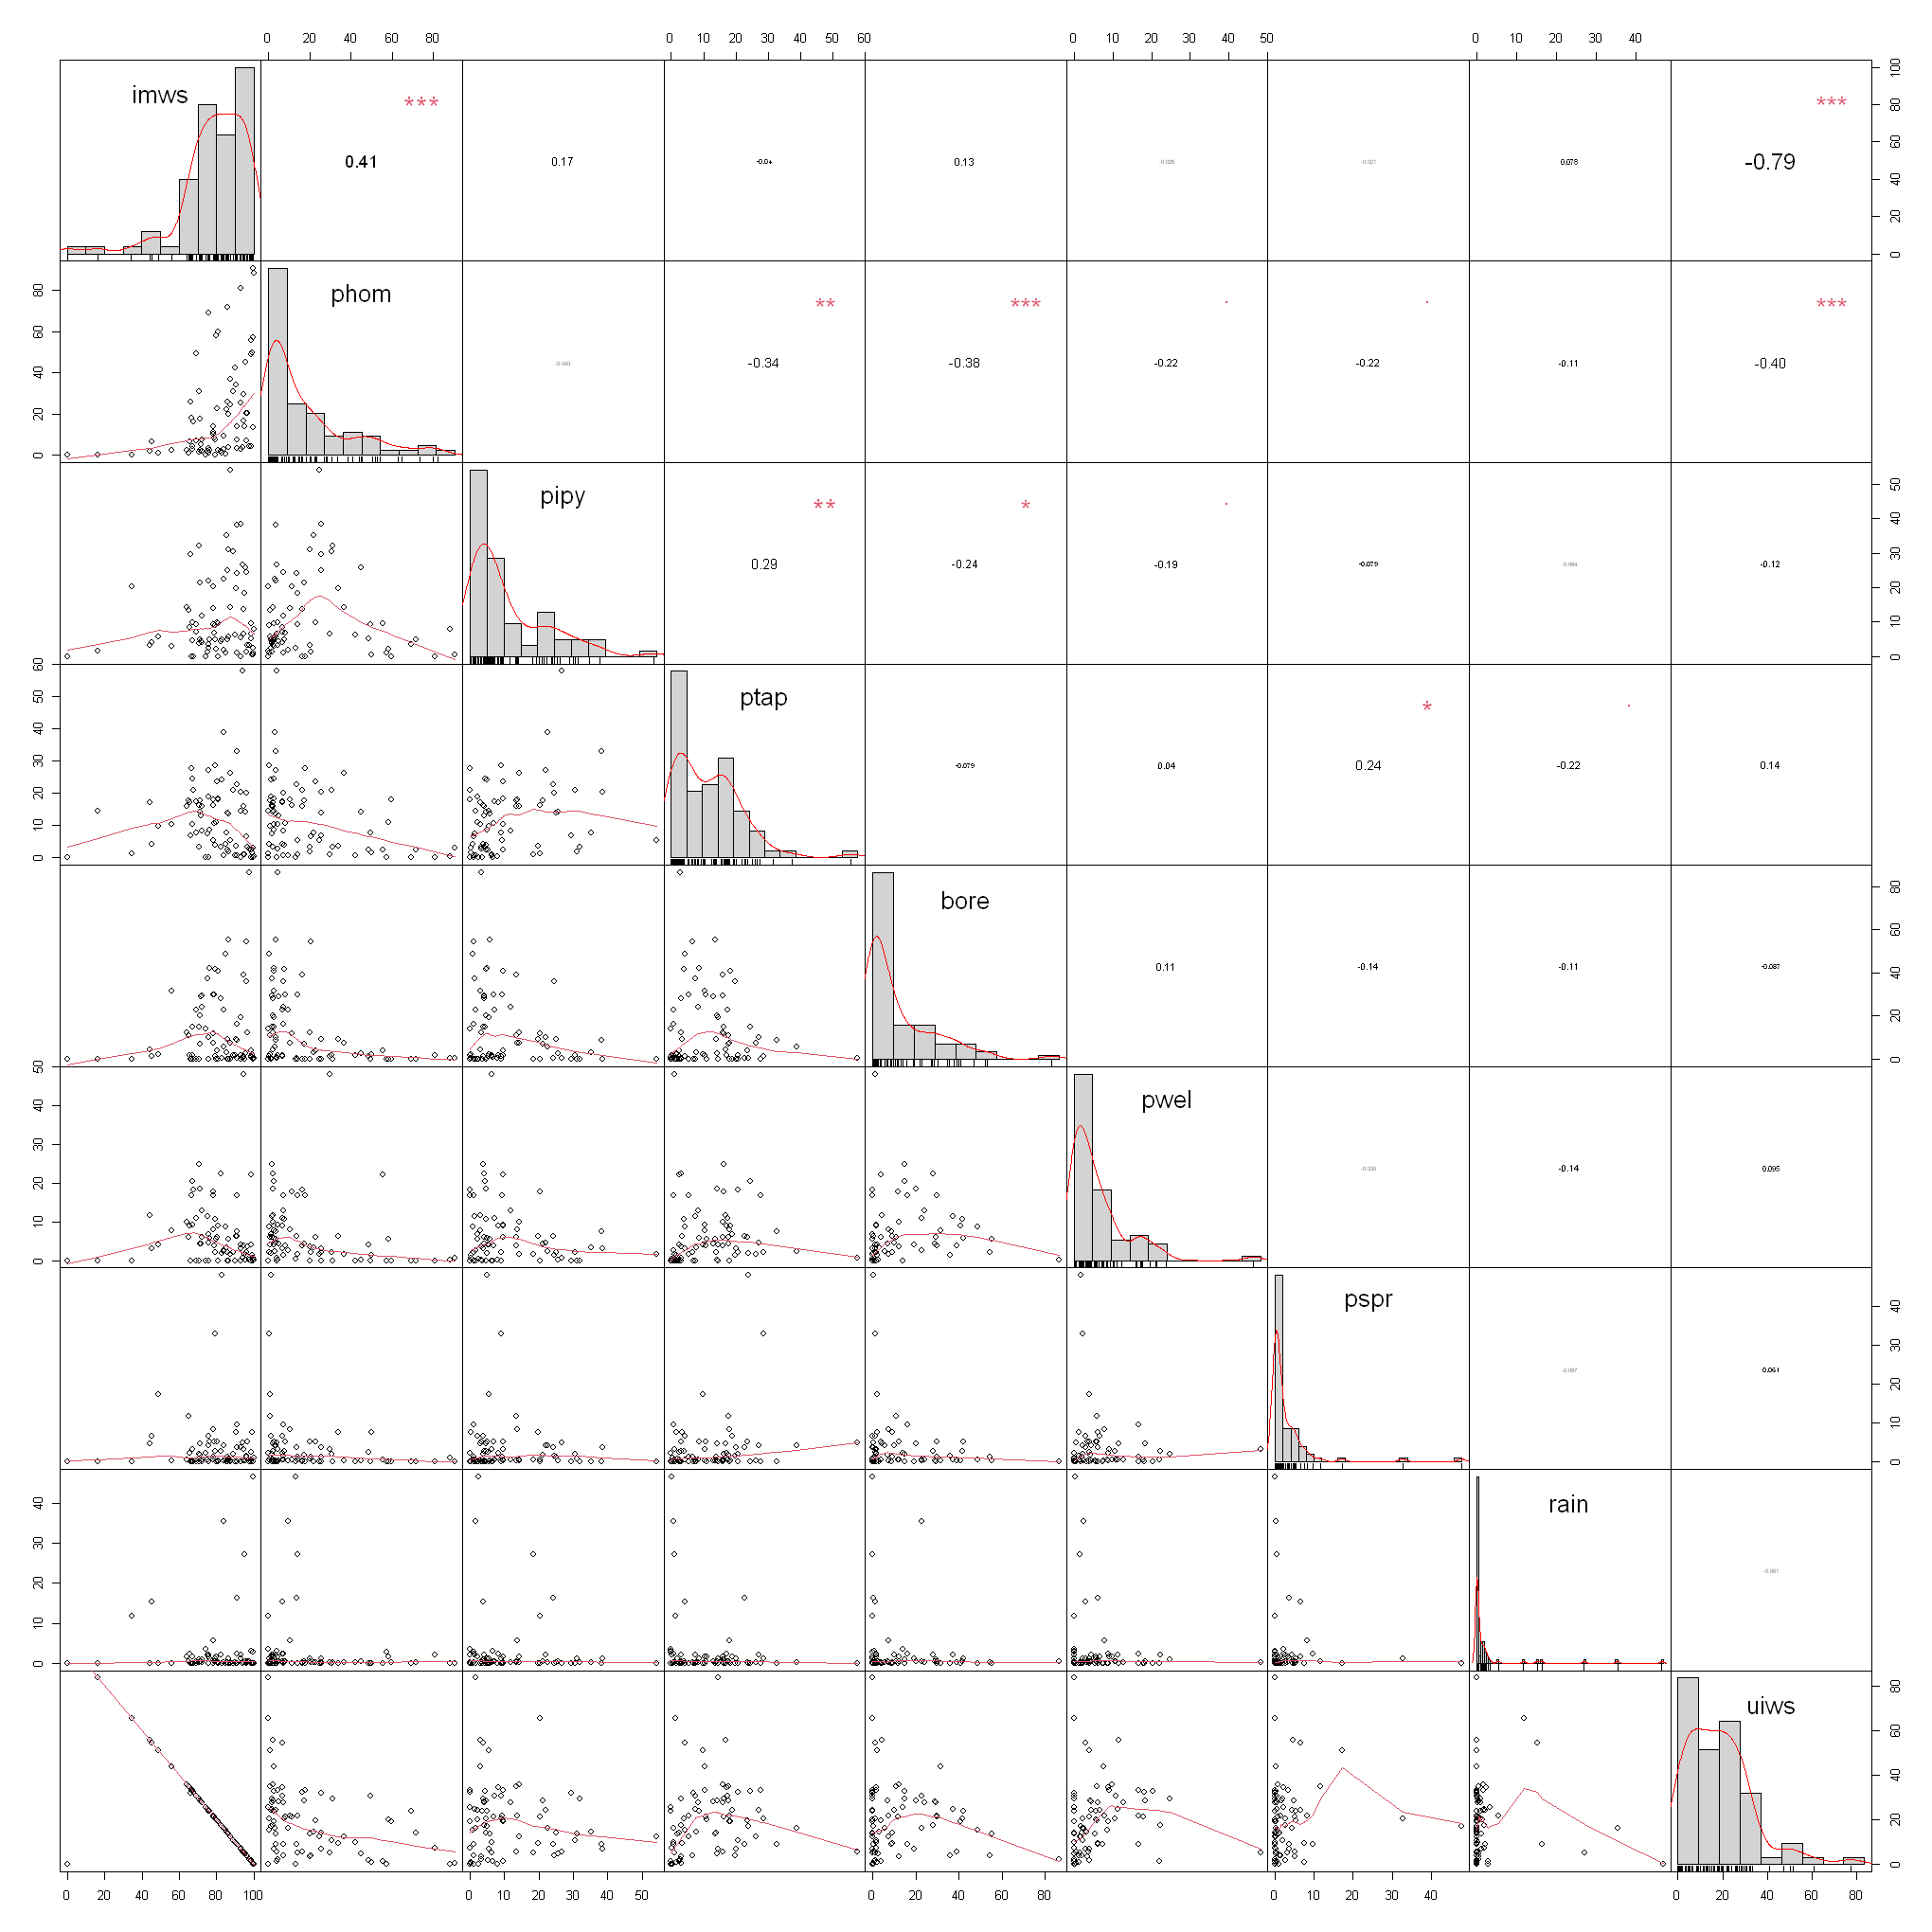

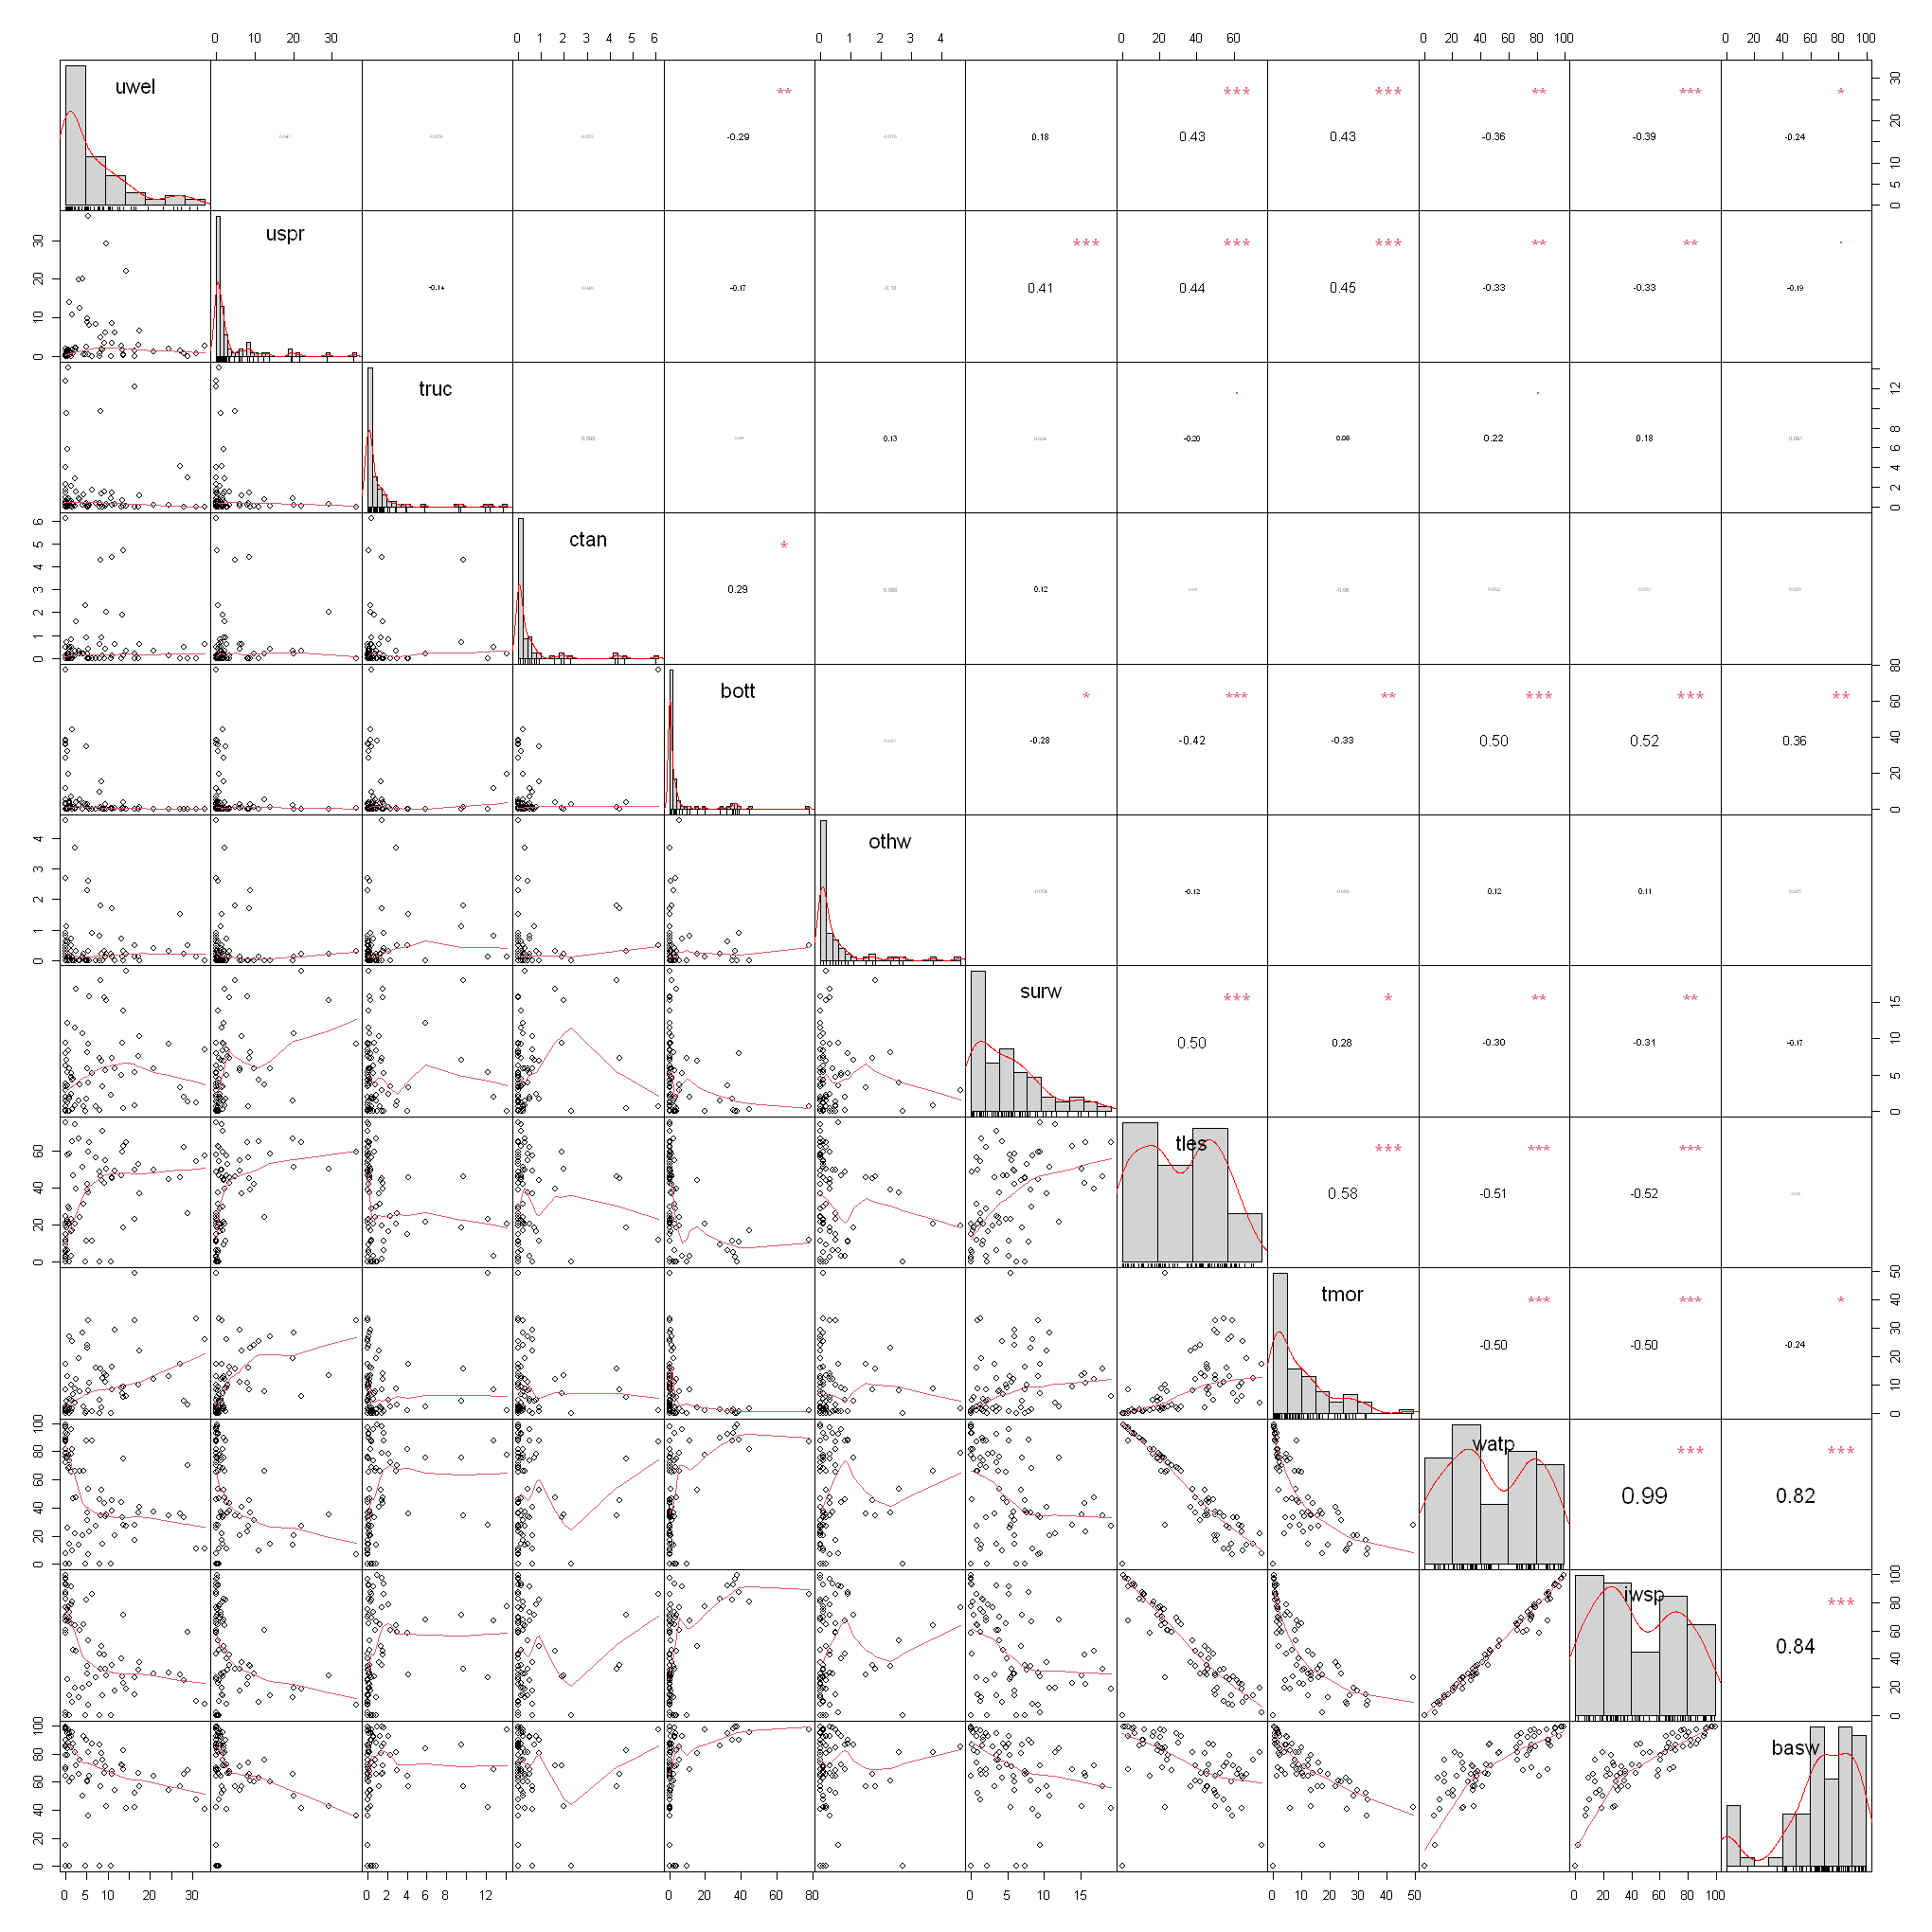

In [77]:
summary(df.wa)
head(df.wa)
chart.Correlation(df.wa[,2:10], histogram=TRUE, pch=19 , tl.cex = .7 )
chart.Correlation(df.wa[,11:22], histogram=TRUE, pch=19 , tl.cex = .7 )

# Spider Plots of the variables

In [78]:
# Create data: Water Accessibility Aggregate
df.wa <- df.wa[,c(2:23)]
head(df.wa)
df.wa.aggregate <- aggregate(df.wa, list(clusters=dfsimple$clusters), mean)
df.wa.aggregate <- df.wa.aggregate[,1:23]
df.wa.aggregate

imws,phom,pipy,ptap,bore,pwel,pspr,rain,uiws,uwel,...,ctan,bott,othw,surw,tles,tmor,watp,iwsp,basw,liws
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
71.2,2.3,4.8,14.2,20.1,18.5,4.7,0.4,28.7,11.1,...,4.4,0.2,1.7,7.3,45.2,8.2,45.3,35.4,65.3,5.0
98.4,48.8,5.2,2.4,1.4,4.1,2.5,0.0,1.6,0.8,...,0.2,19.6,0.1,0.0,20.6,1.1,77.9,77.0,97.0,0.9
66.9,4.3,9.7,10.3,1.9,9.1,3.3,1.7,33.1,8.3,...,4.3,1.2,1.8,18.0,46.1,15.6,34.5,32.6,57.0,7.5
99.9,88.3,8.0,0.5,0.2,0.2,1.0,0.0,0.1,0.0,...,0.0,0.0,0.0,0.0,1.6,0.1,97.6,97.6,99.1,0.1
90.6,34.0,19.7,3.5,9.3,6.2,7.5,0.0,9.4,0.2,...,0.7,0.1,1.1,7.0,18.7,4.4,75.9,71.2,86.4,3.4
97.8,4.3,3.3,2.7,86.4,0.2,0.0,0.4,2.2,0.6,...,0.1,0.3,0.1,1.2,22.7,1.6,75.5,75.1,96.4,1.3


clusters,imws,phom,pipy,ptap,bore,pwel,pspr,rain,uiws,...,ctan,bott,othw,surw,tles,tmor,watp,iwsp,basw,liws
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,71.75263,4.976316,8.894737,16.957895,17.028947,9.110526,4.8447368,1.128947,28.21053,...,0.5342105,1.000000,0.3447368,7.784211,52.57632,16.778947,29.25789,26.18684,61.48947,9.357895
2,89.81818,33.460606,14.506061,7.760606,9.245455,2.060606,1.7030303,3.290909,10.09091,...,0.5060606,13.209091,0.6121212,2.672727,16.41818,2.769697,80.09091,76.12424,87.60606,1.678788
3,66.77143,31.714286,6.271429,2.342857,4.042857,11.185714,0.5285714,6.985714,18.90000,...,0.4142857,2.871429,0.4428571,2.242857,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000


# Extract table of cluster centroids.

[1] 124.19175 173.27668  78.05179

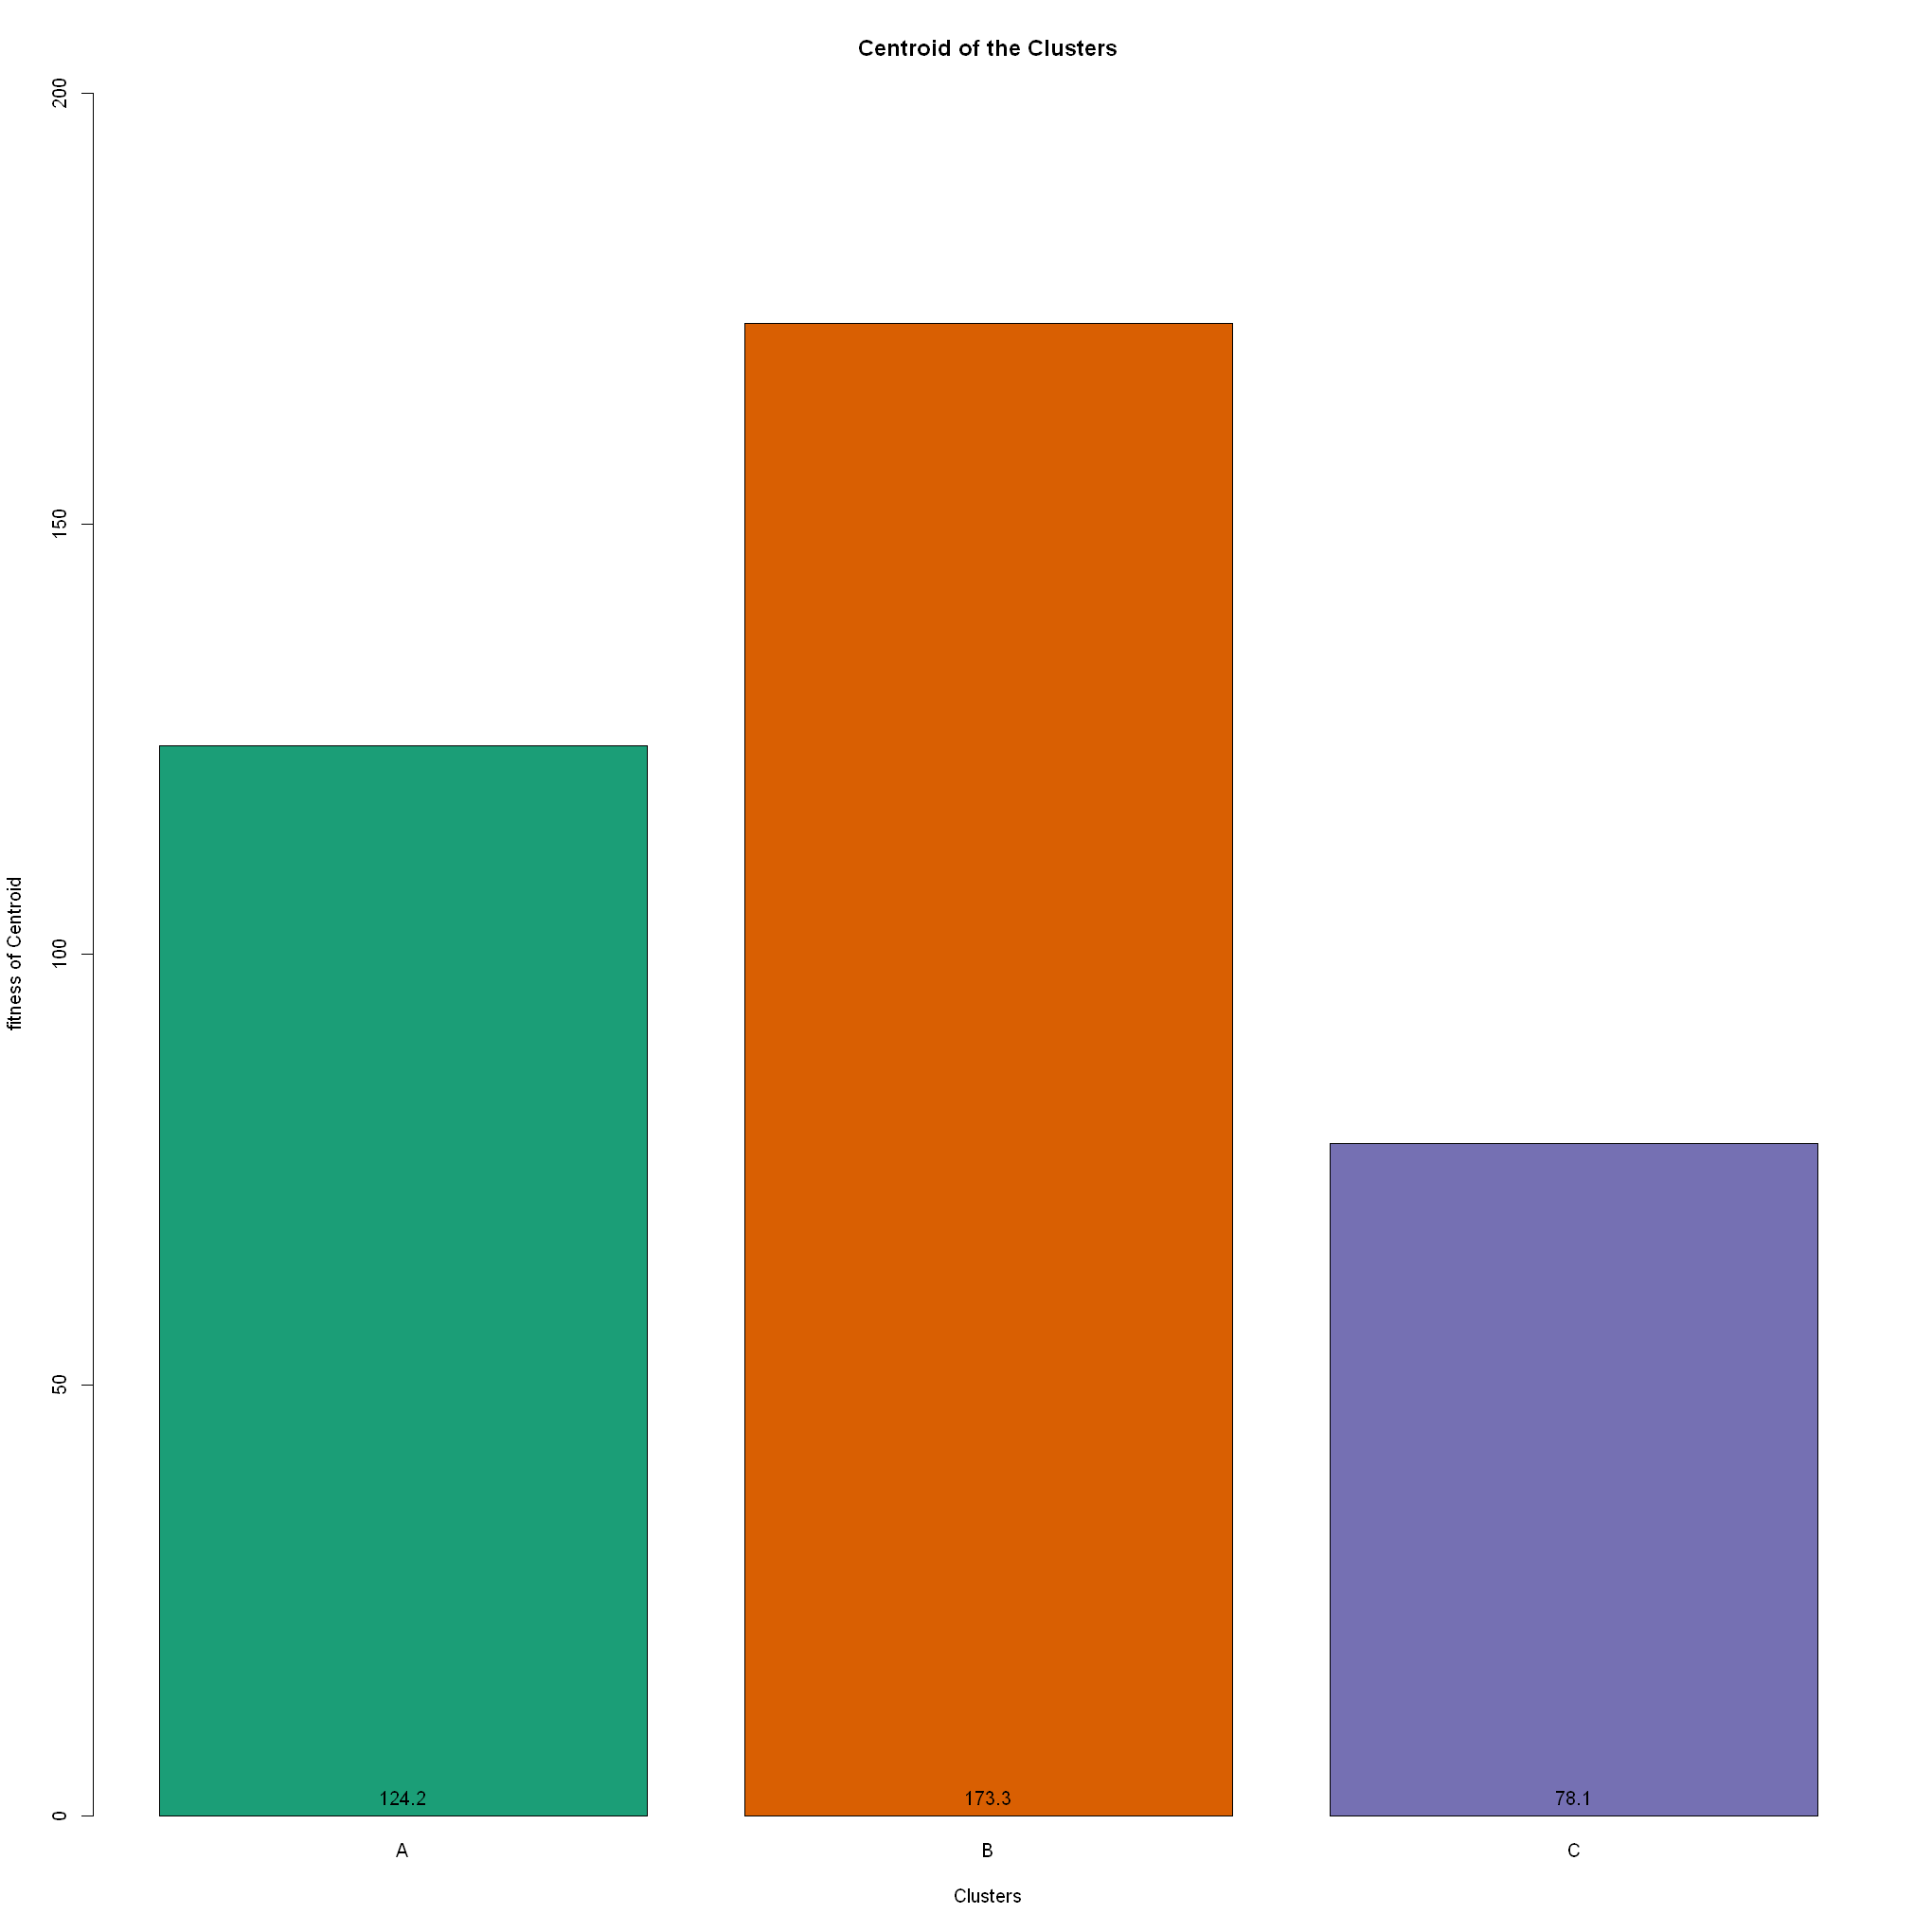

[1] 129.8893 185.8534 119.7919 216.1467 169.8596 195.5154

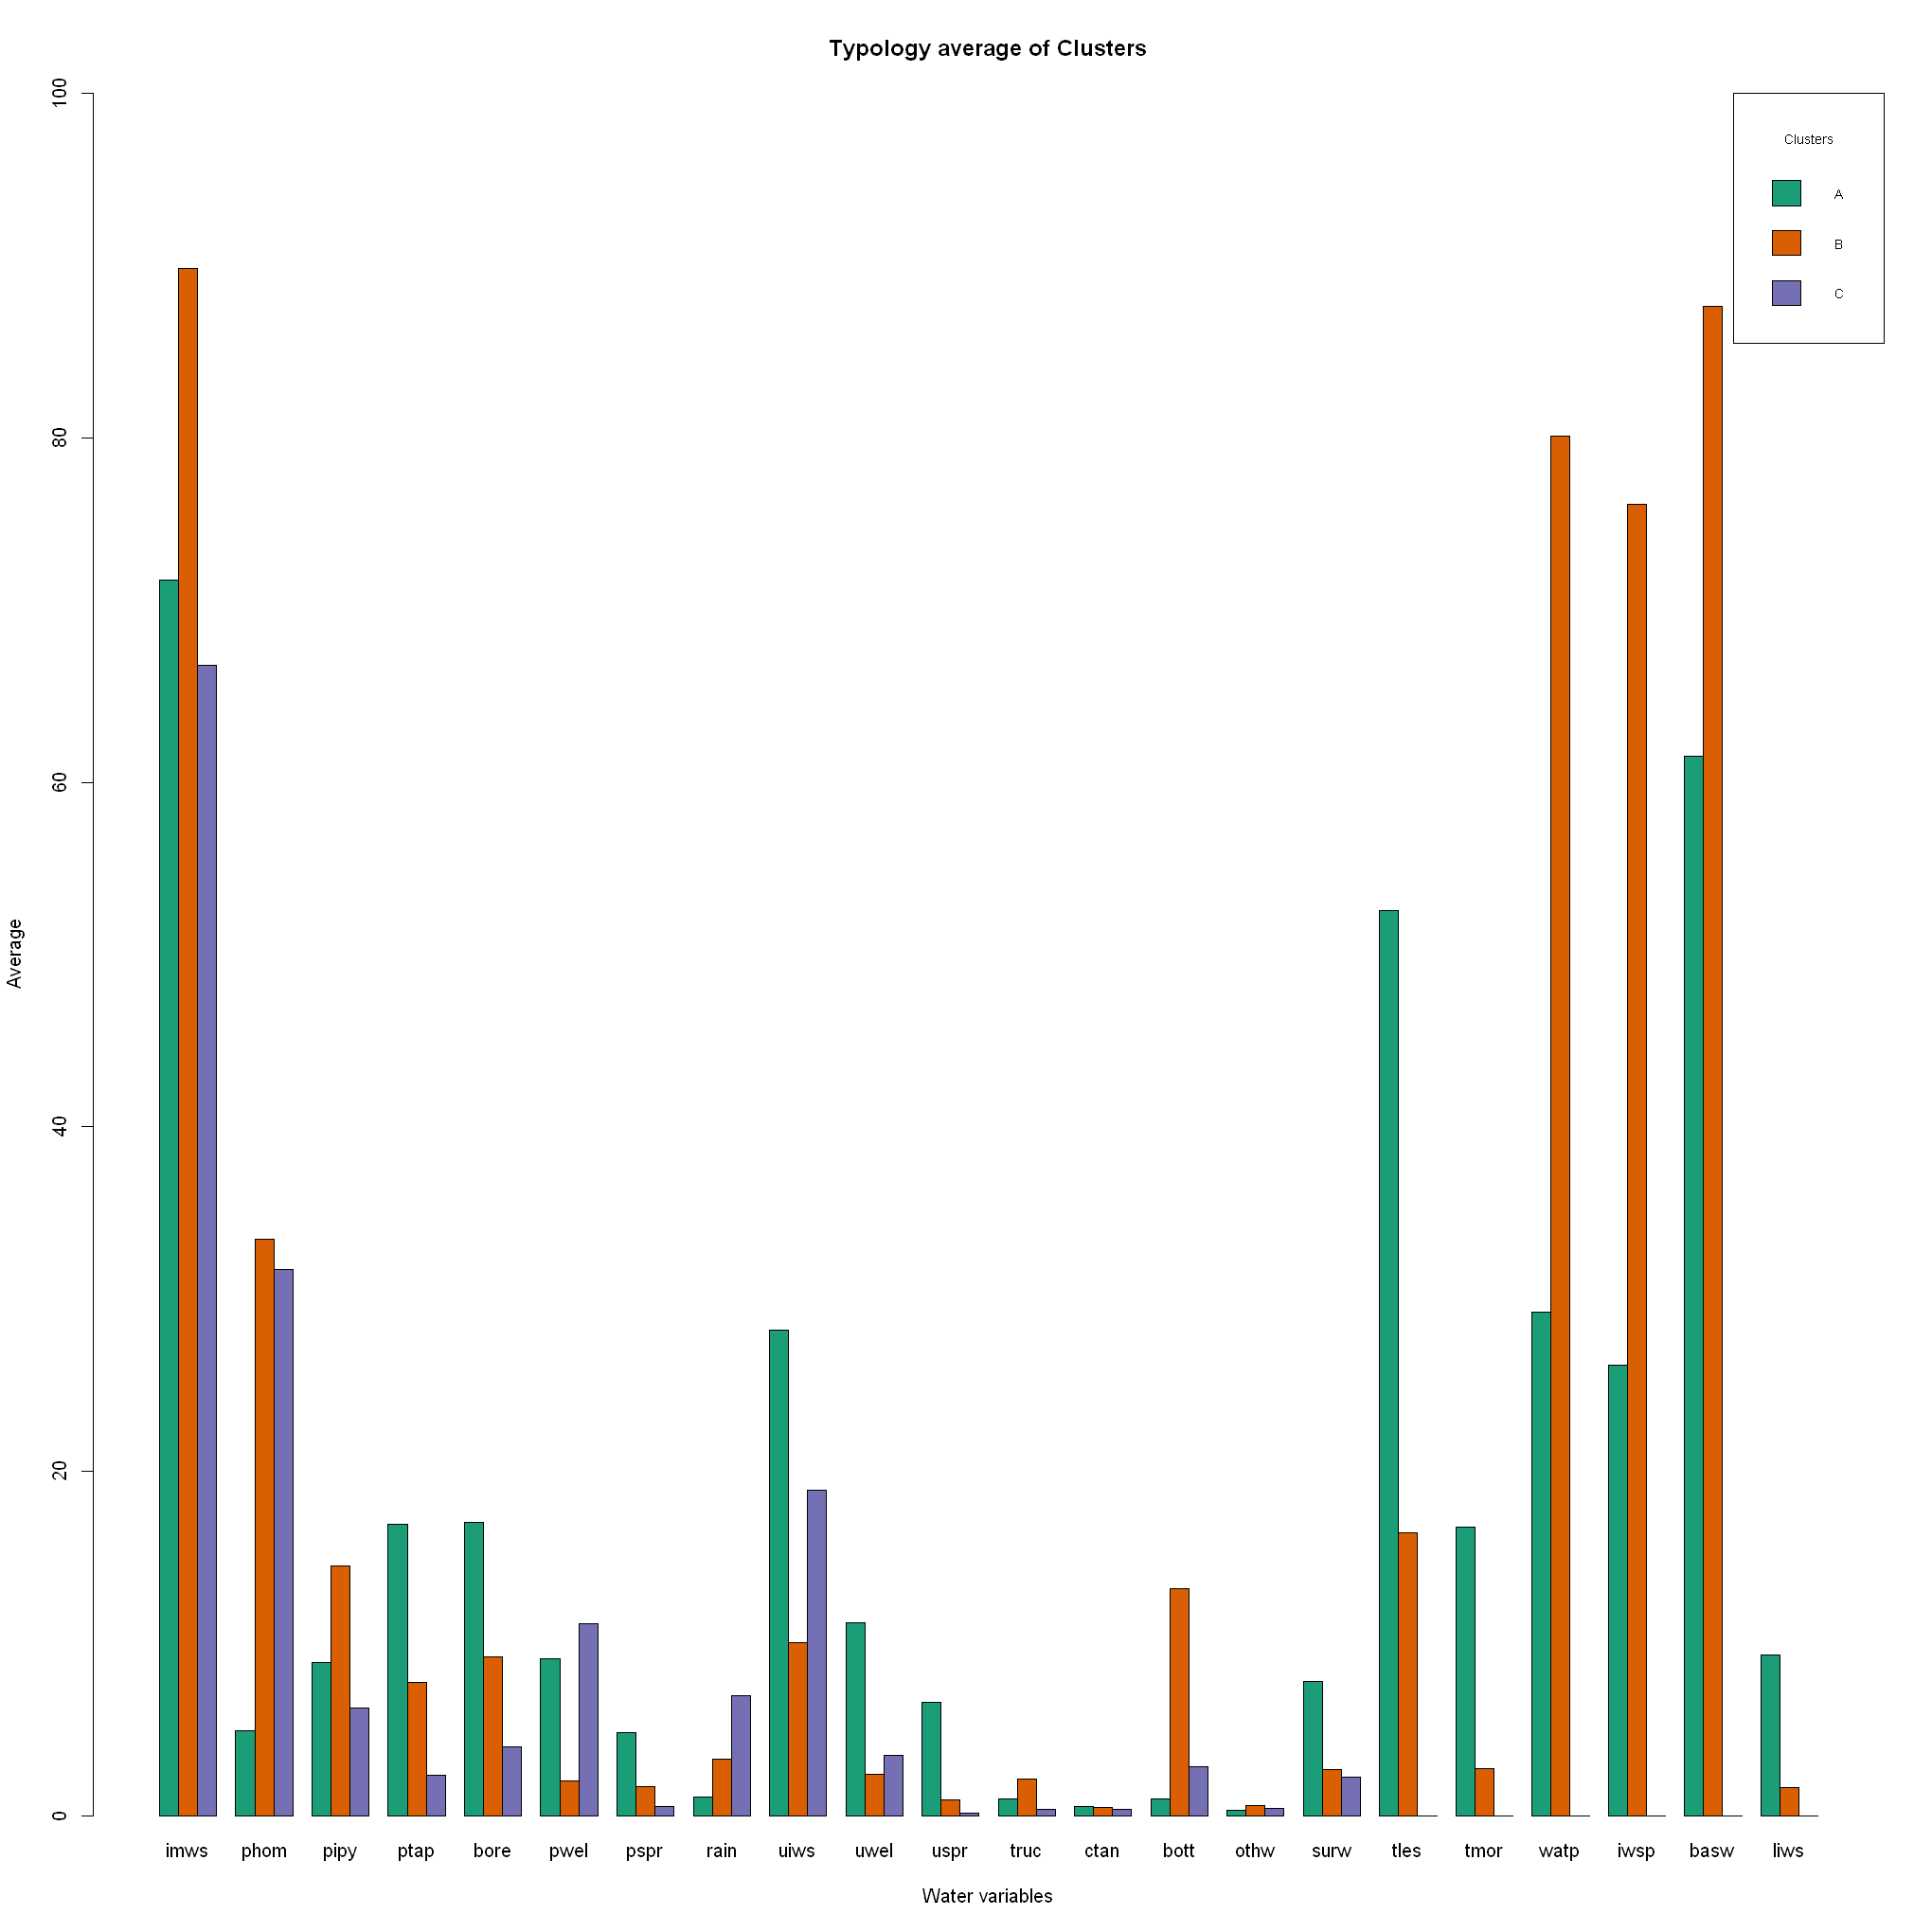

In [79]:
centroid <- apply(df.wa.aggregate, 1, function(x) sqrt(sum(x^2)) ) #How close is each country to the centroid of the cluster
centroid
old.par <- par(mar = c(0, 0, 0, 0))
par(old.par)

bp <- barplot(centroid,
        main = "Centroid of the Clusters", xlab = "Clusters", ylab = "fitness of Centroid",
        col = c("#1b9e77","#d95f02","#7570b3"),
        ylim = c(0, 200), names.arg = c("A", "B", "C"))
text(bp, 0, round(centroid, 1),cex=1,pos=3)
options(repr.plot.width=17, repr.plot.height=17)
barplot(as.matrix(df.wa.aggregate[,c(2:23)]),
        beside = TRUE,
        main = "Typology average of Clusters", xlab = "Water variables", ylab = "Average",
        col = c("#1b9e77","#d95f02","#7570b3"),
        legend = c("A", "B", "C"), 
        args.legend = list(title = "Clusters", x = "topright", cex = .7), ylim = c(0, 100))
                  


centroiddf.wa <- apply(df.wa, 1, function(x) sqrt(sum(x^2)) ) #How close is each country to the cen-troid of the cluster
head(centroiddf.wa)


In [80]:
centroiddf.wa
str(centroiddf.wa)

[1] 129.88930 185.85336 119.79194 216.14673 169.85956 195.51540 128.56096
 [8] 185.04167 105.69328 130.05630 140.09832  96.79861 135.74082 117.44756
[15] 115.25329 203.36598 159.77368 127.59514 114.13413 138.50939 201.34672
[22] 212.88891 118.02305 132.35279 117.11682 166.43927 158.15075 153.36776
[29] 179.21568 129.78894 193.06390 129.30742 187.80506 171.41992 181.28334
[36] 210.45691 151.67927 137.61918 167.70206 140.94776 151.41407 116.57217
[43] 149.59328 205.57548 132.06389 124.32240 110.78312 102.16154 118.38226
[50] 149.51669 154.44213 175.84360 154.69515 121.19975 137.00412 179.78059
[57] 114.34024   0.00000 180.19312 185.53776 132.08671 155.67093 165.39797
[64] 129.15920 182.00918 164.38193 121.12597 150.45843 132.60483 201.28845
[71] 146.25450 126.31544 116.06464 162.74766  77.99295 154.18103 130.36380
[78] 134.03320

 num [1:78] 130 186 120 216 170 ...


# Radar Plot for the aggregated data

,imws,phom,pipy,ptap,bore,pwel,pspr,rain,uiws,uwel,...,ctan,bott,othw,surw,tles,tmor,watp,iwsp,basw,liws
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0000000,100.000000,100.00000,100.000000,...,100.0000000,100.000000,100.0000000,100.000000,100.00000,100.000000,100.00000,100.00000,100.00000,100.000000
2,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000000,0.000000,0.00000,0.000000,...,0.0000000,0.000000,0.0000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000
3,71.75263,4.976316,8.894737,16.957895,17.028947,9.110526,4.8447368,1.128947,28.21053,11.242105,...,0.5342105,1.000000,0.3447368,7.784211,52.57632,16.778947,29.25789,26.18684,61.48947,9.357895
4,89.81818,33.460606,14.506061,7.760606,9.245455,2.060606,1.7030303,3.290909,10.09091,2.427273,...,0.5060606,13.209091,0.6121212,2.672727,16.41818,2.769697,80.09091,76.12424,87.60606,1.678788
5,66.77143,31.714286,6.271429,2.342857,4.042857,11.185714,0.5285714,6.985714,18.90000,3.528571,...,0.4142857,2.871429,0.4428571,2.242857,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000


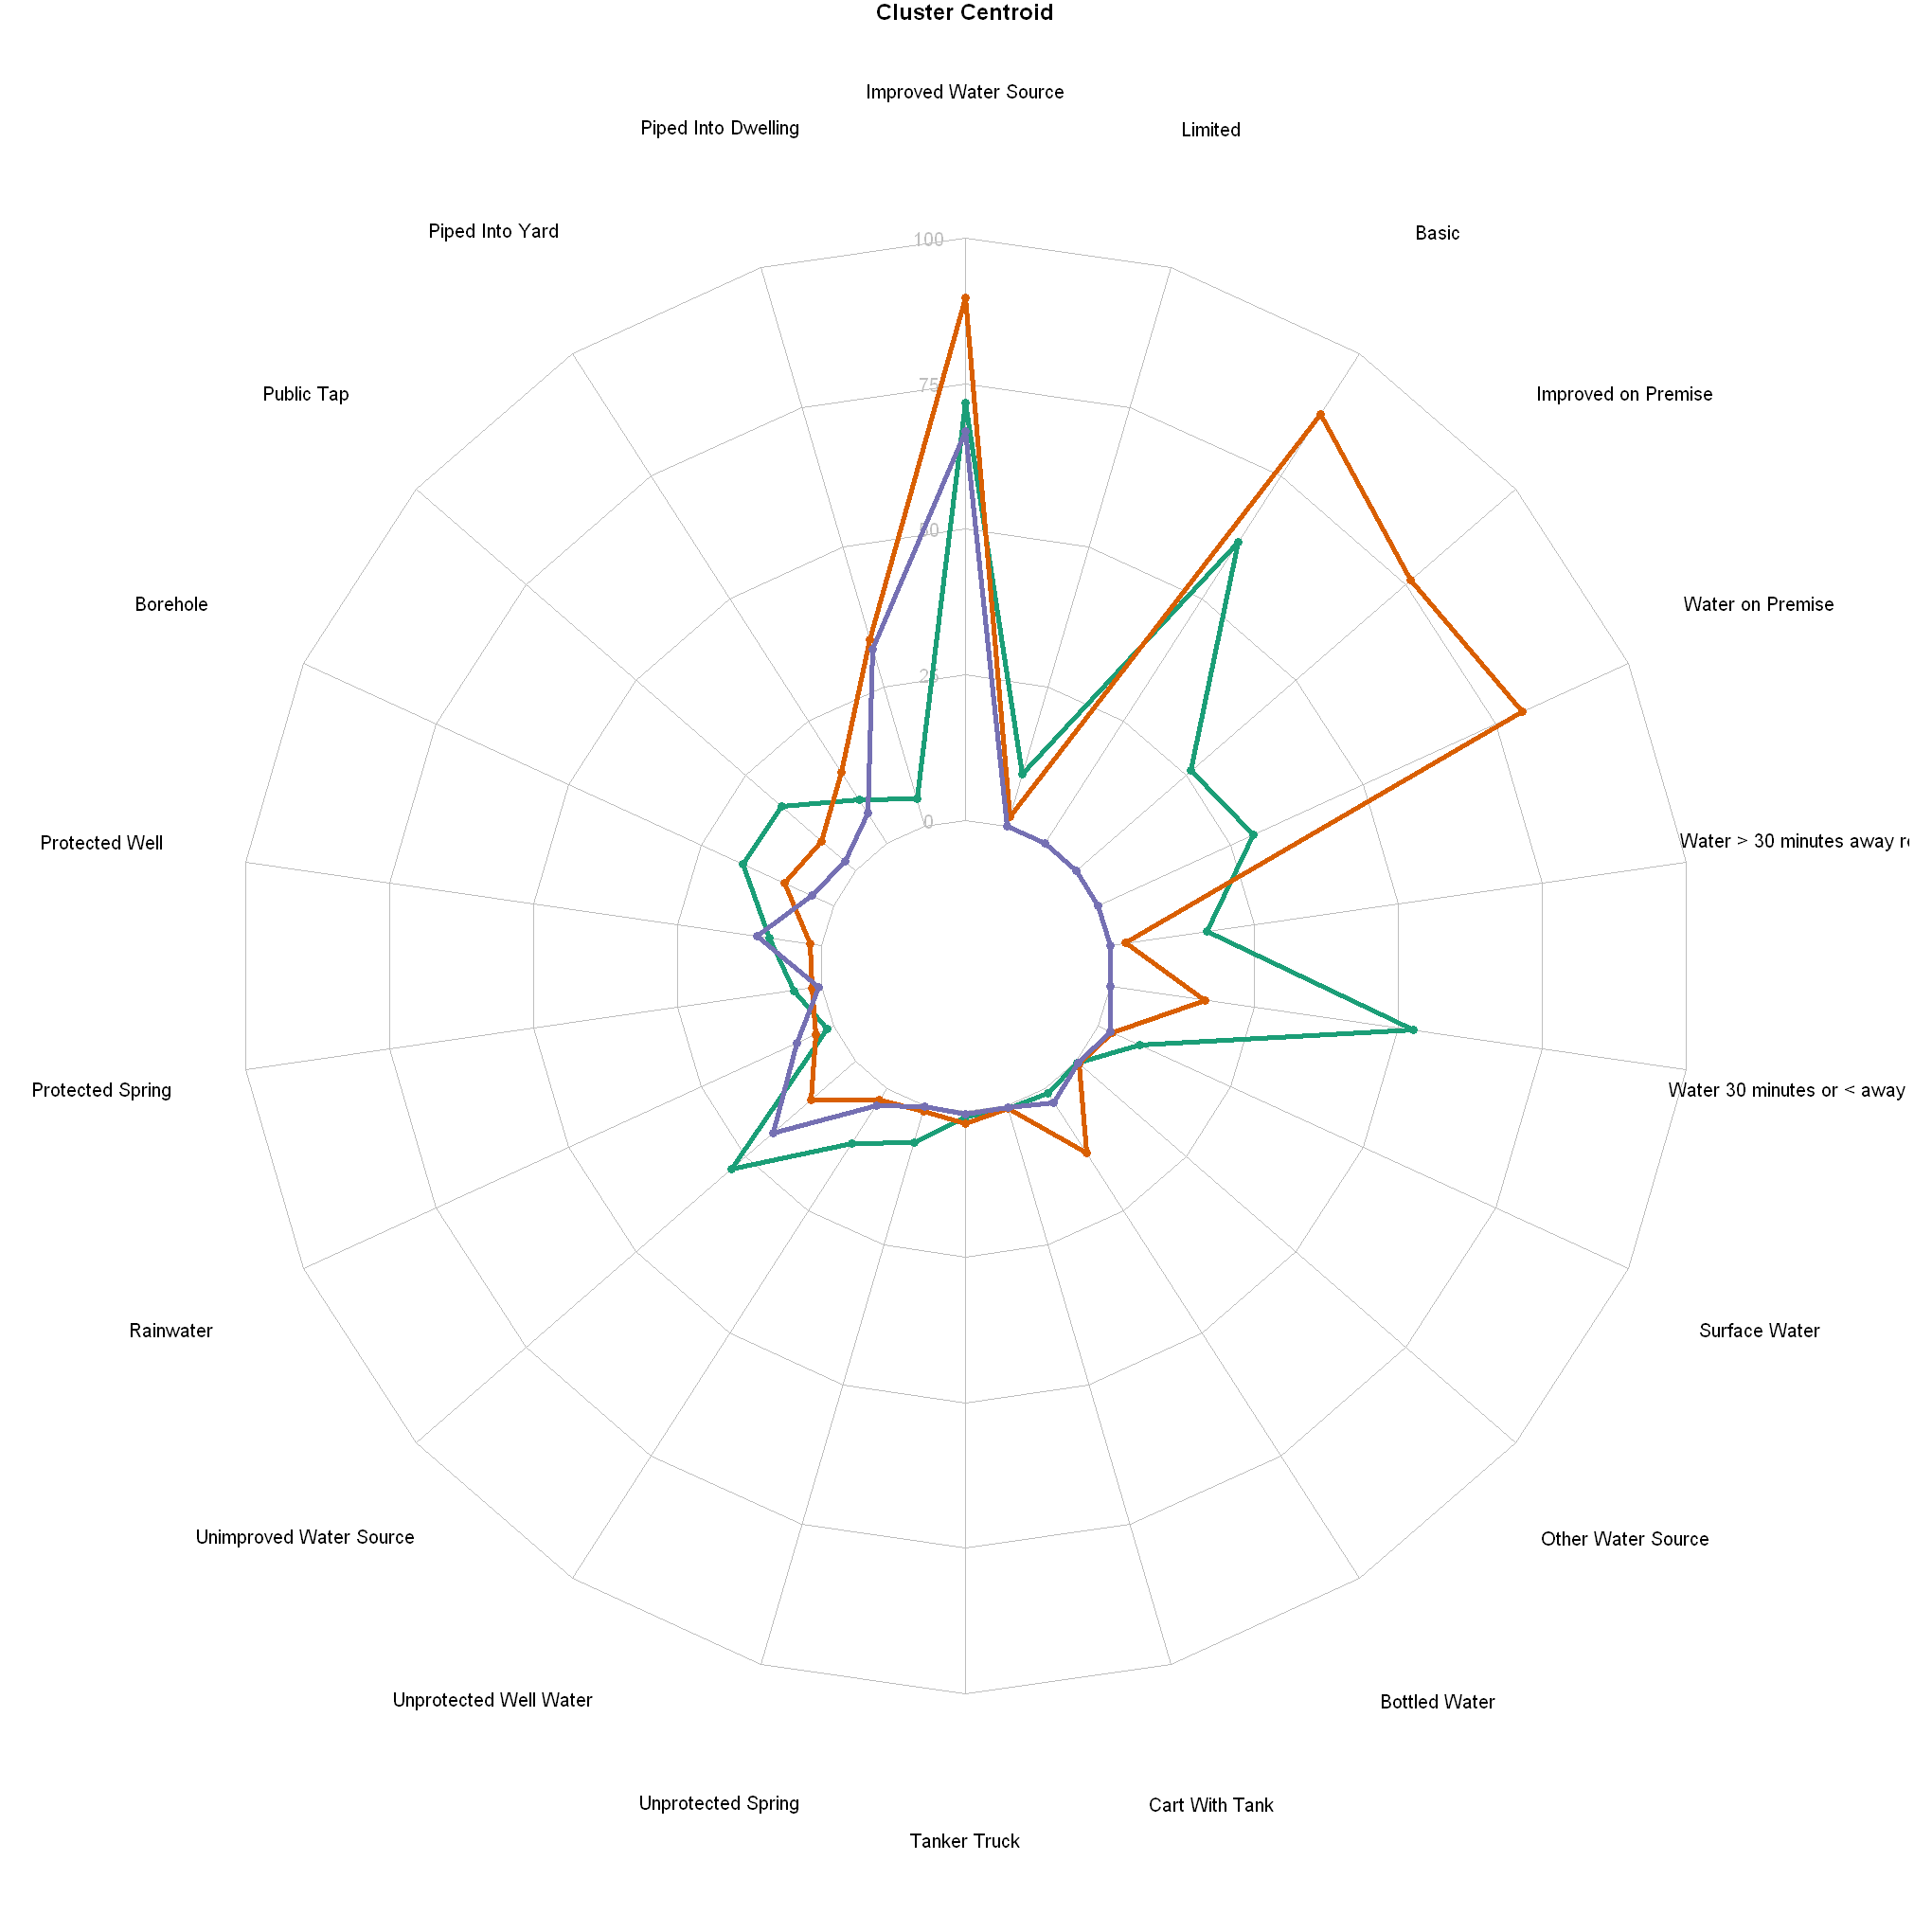

In [81]:
# To use the fmsb package, I have to add 2 lines to the data frame: the max and min of each topic to show on the plot!
#max.aggregate = apply(df.wa.aggregate,2,max)
#apply(df.wa.aggregate,2,min)
#max.aggregate
#norm.df.wa <- sweep(df.wa.aggregate, 2, max.aggregate, FUN = '/')

data.spider <- rbind(rep(100,50) , rep(0,10) , df.wa.aggregate[,c(2:23)])

head(data.spider,7)
colnames(data.spider) <- c(
                            'Improved Water Source',
    "Piped Into Dwelling",
    'Piped Into Yard',
    "Public Tap" ,
    "Borehole" , 
     "Protected Well" ,
       "Protected Spring", 
    "Rainwater" ,
    'Unimproved Water Source',
    "Unprotected Well Water", 
    "Unprotected Spring", 
    'Tanker Truck',
    'Cart With Tank',
    'Bottled Water',
    'Other Water Source',
    "Surface Water" ,
     "Water 30 minutes or < away round trip" , 
    "Water > 30 minutes away round trip" , 
    'Water on Premise',
    'Improved on Premise',
           'Basic',
    'Limited')                       
options(repr.plot.width=17, repr.plot.height=17)
par(mar = c(1,1,1,1))
par(cex=1)

# The default radar chart for First Cluster
r.c. <- radarchart(data.spider,
           #custom polygon
           pcol= c("#1b9e77","#d95f02","#7570b3") ,
           plwd=4 , plty=1,
           #custom the grid
           cglcol="grey", cglty=1, axislabcol="grey", caxislabels= seq(0,100,25), cglwd=0.8, axistype = 4,
           title = 'Cluster Centroid',
           vlcex=1,
           calcex = 1 ,
                   
           )

# Box Plot of Water Accessibility Variables (Violin Plots)

imws,phom,pipy,ptap,bore,pwel,pspr,rain,uiws,uwel,...,truc,ctan,bott,othw,surw,tles,tmor,watp,iwsp,basw
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
71.75263,4.976316,8.894737,16.957895,17.028947,9.110526,4.8447368,1.128947,28.21053,11.242105,...,0.9921053,0.5342105,1.000000,0.3447368,7.784211,52.57632,16.778947,29.25789,26.18684,61.48947
89.81818,33.460606,14.506061,7.760606,9.245455,2.060606,1.7030303,3.290909,10.09091,2.427273,...,2.1393939,0.5060606,13.209091,0.6121212,2.672727,16.41818,2.769697,80.09091,76.12424,87.60606
66.77143,31.714286,6.271429,2.342857,4.042857,11.185714,0.5285714,6.985714,18.90000,3.528571,...,0.4000000,0.4142857,2.871429,0.4428571,2.242857,0.00000,0.000000,0.00000,0.00000,0.00000


[1] "factor" "factor" "factor" "factor" "factor" "factor" "factor" "factor"
 [9] "factor" "factor" "factor" "factor" "factor" "factor" "factor" "factor"
[17] "factor" "factor" "factor" "factor" "factor"

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"position_dodge requires non-overlapping x intervals"


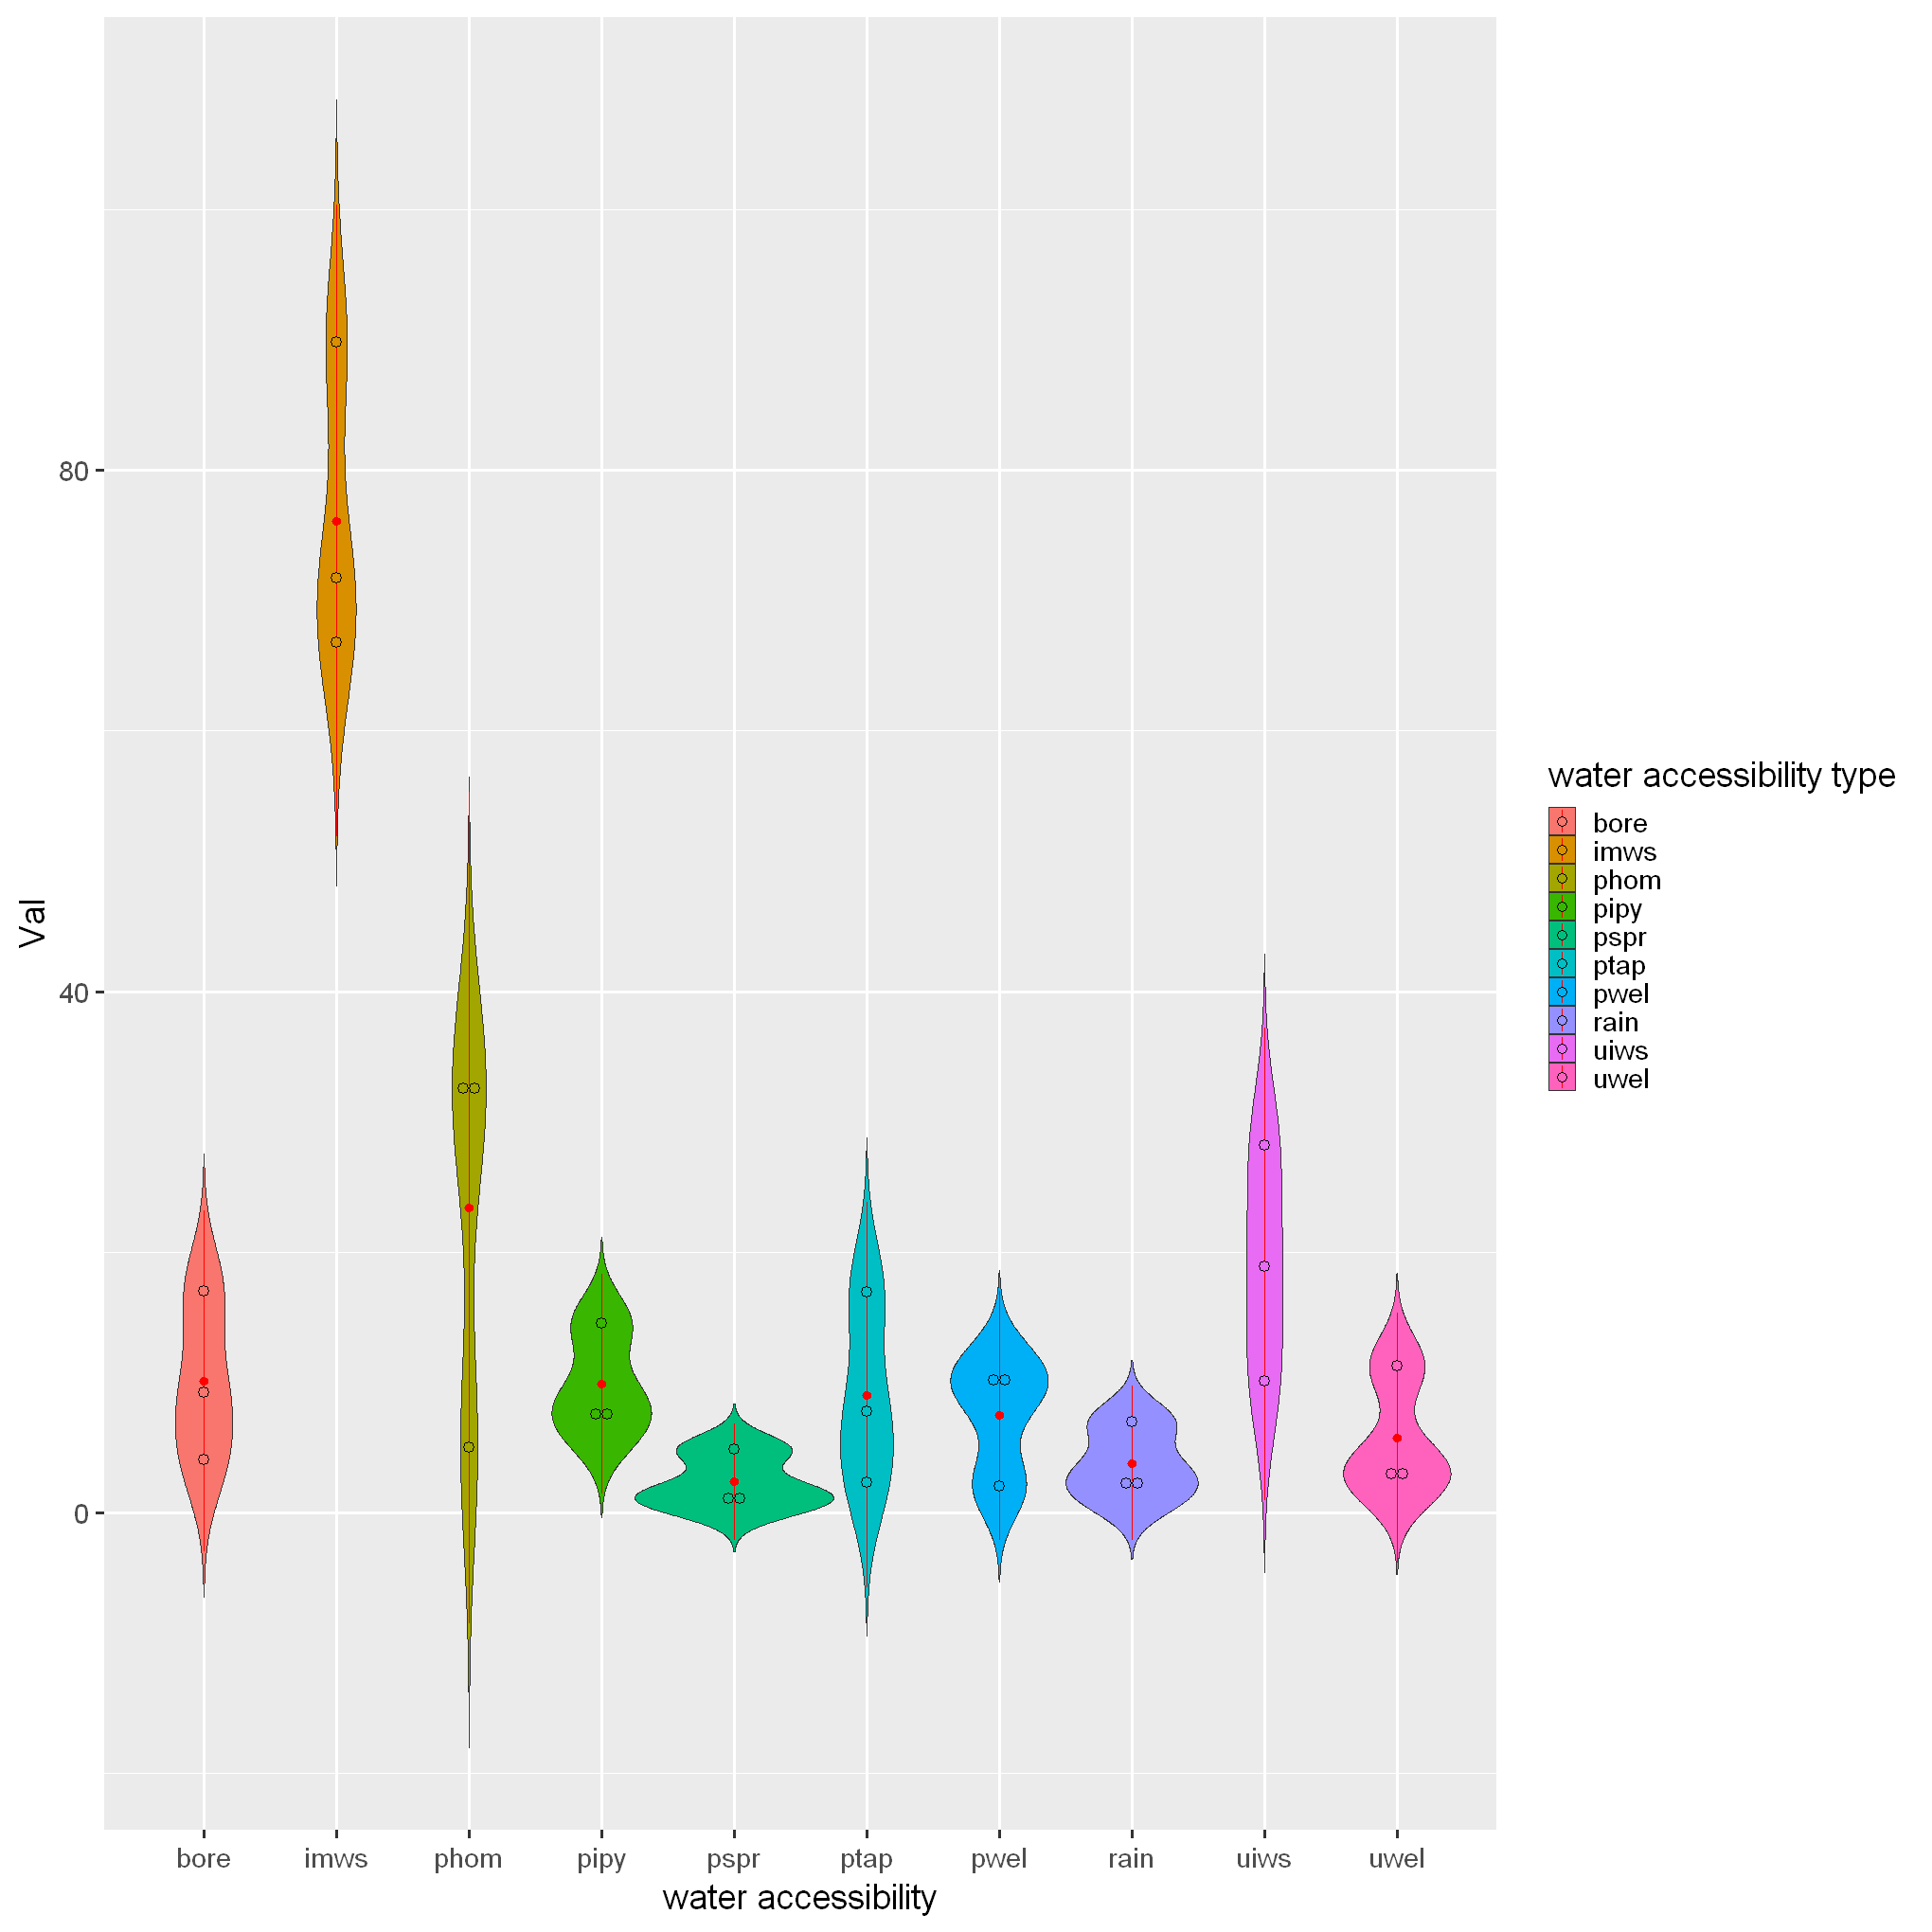

In [82]:
df.wa.aggregate <- aggregate(df.wa, list(clusters=dfsimple$clusters), mean)
df.wa.aggregate <- df.wa.aggregate[,2:22]
df.wa.aggregate
rownames(df.wa.aggregate) <- c('A','B','C')

data_wa_one <- df.wa.aggregate[  , 1:10]

df.wa.aggregate <- as.factor(df.wa.aggregate[,])
sapply(df.wa.aggregate, class)


options(repr.plot.width=17, repr.plot.height=17)
par(mar = c(1,1,1,1))
par(cex=5)

p <- data_wa_one %>% 
    gather(key="MesureType", value="Val") %>%
    ggplot( aes(x=MesureType, y=Val, fill=MesureType)) +
    geom_violin(trim=FALSE, width=1.5, size=.3) + 
    
    stat_summary(fun.data=mean_sdl, geom="pointrange", color="red") + 
    scale_color_brewer(palette="Dark2") +
    xlab('water accessibility') +
    geom_dotplot(binaxis='y', stackdir='center', dotsize=.3) +
    guides(fill =guide_legend("water accessibility type"))
p <- p + theme_grey(base_size = 22)
p 




imws,phom,pipy,ptap,bore,pwel,pspr,rain,uiws,uwel,...,truc,ctan,bott,othw,surw,tles,tmor,watp,iwsp,basw
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
71.75263,4.976316,8.894737,16.957895,17.028947,9.110526,4.8447368,1.128947,28.21053,11.242105,...,0.9921053,0.5342105,1.000000,0.3447368,7.784211,52.57632,16.778947,29.25789,26.18684,61.48947
89.81818,33.460606,14.506061,7.760606,9.245455,2.060606,1.7030303,3.290909,10.09091,2.427273,...,2.1393939,0.5060606,13.209091,0.6121212,2.672727,16.41818,2.769697,80.09091,76.12424,87.60606
66.77143,31.714286,6.271429,2.342857,4.042857,11.185714,0.5285714,6.985714,18.90000,3.528571,...,0.4000000,0.4142857,2.871429,0.4428571,2.242857,0.00000,0.000000,0.00000,0.00000,0.00000


[1] "factor" "factor" "factor" "factor" "factor" "factor" "factor" "factor"
 [9] "factor" "factor" "factor" "factor" "factor" "factor" "factor" "factor"
[17] "factor" "factor" "factor" "factor" "factor"

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



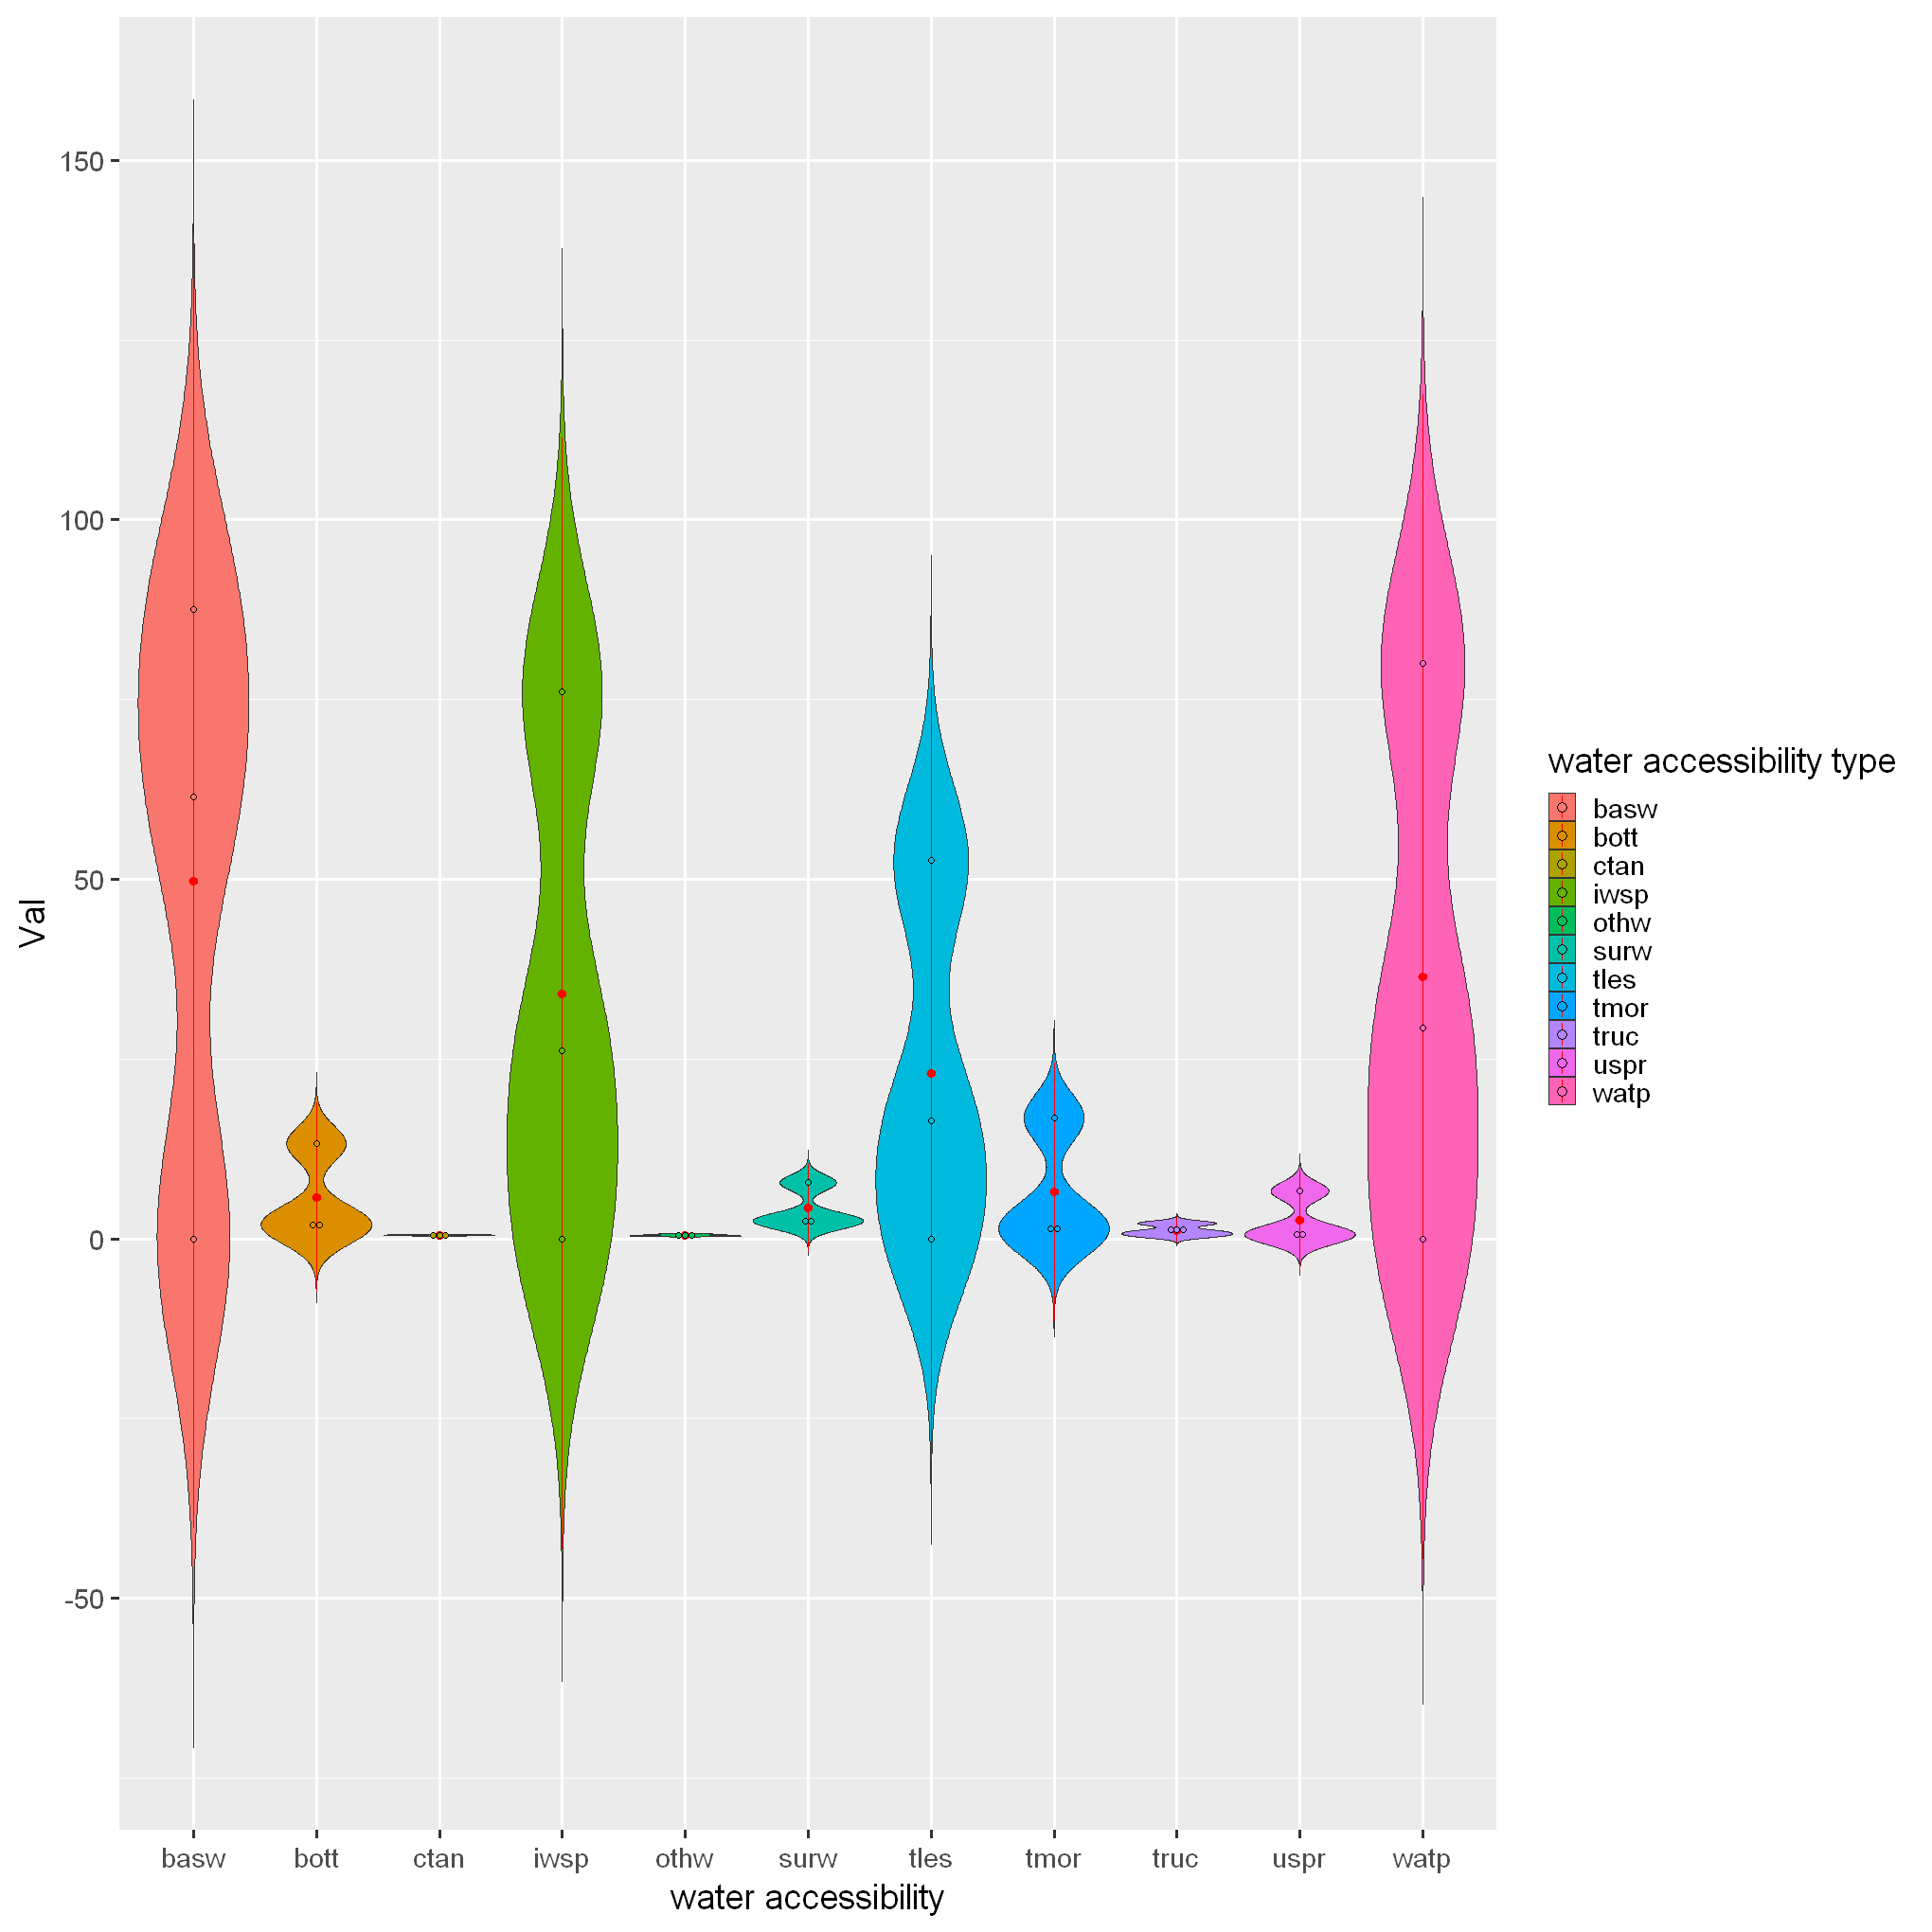

In [83]:
df.wa.aggregate <- aggregate(df.wa, list(clusters=dfsimple$clusters), mean)
df.wa.aggregate <- df.wa.aggregate[,2:22]
df.wa.aggregate
rownames(df.wa.aggregate) <- c('A','B','C')

data_wa_one <- df.wa.aggregate[  , 11:21]

df.wa.aggregate <- as.factor(df.wa.aggregate[,])
sapply(df.wa.aggregate, class)


options(repr.plot.width=17, repr.plot.height=17)
par(mar = c(1,1,1,1))
par(cex=5)

p <- data_wa_one %>% 
    gather(key="MesureType", value="Val") %>%
    ggplot( aes(x=MesureType, y=Val, fill=MesureType)) +
    geom_violin(trim=FALSE, scale = "width"  , size=.3, adjust = .75) + 
    stat_summary(fun.data=mean_sdl, geom="pointrange", color="red") + 
    scale_color_brewer(palette="Dark2") +
    xlab('water accessibility') +
    geom_dotplot(binaxis='y', stackdir='center', dotsize=.3) +
    guides(fill =guide_legend("water accessibility type"))
p <- p + theme_grey(base_size = 22)
p 




# Country's Centroids Rankings Demo

imws,phom,pipy,ptap,bore,pwel,pspr,rain,uiws,uwel,...,bott,othw,surw,tles,tmor,watp,iwsp,basw,liws,clusters
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
71.2,2.3,4.8,14.2,20.1,18.5,4.7,0.4,28.7,11.1,...,0.2,1.7,7.3,45.2,8.2,45.3,35.4,65.3,5.0,1
98.4,48.8,5.2,2.4,1.4,4.1,2.5,0.0,1.6,0.8,...,19.6,0.1,0.0,20.6,1.1,77.9,77.0,97.0,0.9,2
66.9,4.3,9.7,10.3,1.9,9.1,3.3,1.7,33.1,8.3,...,1.2,1.8,18.0,46.1,15.6,34.5,32.6,57.0,7.5,1
99.9,88.3,8.0,0.5,0.2,0.2,1.0,0.0,0.1,0.0,...,0.0,0.0,0.0,1.6,0.1,97.6,97.6,99.1,0.1,2
90.6,34.0,19.7,3.5,9.3,6.2,7.5,0.0,9.4,0.2,...,0.1,1.1,7.0,18.7,4.4,75.9,71.2,86.4,3.4,2
97.8,4.3,3.3,2.7,86.4,0.2,0.0,0.4,2.2,0.6,...,0.3,0.1,1.2,22.7,1.6,75.5,75.1,96.4,1.3,2
71.7,5.1,4.2,13.0,28.9,4.4,0.3,0.4,28.3,20.8,...,0.0,0.4,5.8,49.8,12.1,37.4,29.6,64.0,7.3,1
87.3,24.6,54.1,5.3,0.0,1.7,0.0,0.0,12.3,6.2,...,0.0,0.9,5.2,11.2,0.7,88.0,85.7,87.3,0.0,2
76.0,69.2,3.5,0.0,0.0,0.0,0.0,0.0,24.0,0.0,...,3.3,2.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3



 1  2  3 
38 33  7 

,clusters,imws,phom,pipy,ptap,bore,pwel,pspr,rain,uiws,...,ctan,bott,othw,surw,tles,tmor,watp,iwsp,basw,liws
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,71.75263,4.976316,8.894737,16.957895,17.028947,9.110526,4.8447368,1.128947,28.21053,...,0.5342105,1.000000,0.3447368,7.784211,52.57632,16.778947,29.25789,26.18684,61.48947,9.357895
2,2,89.81818,33.460606,14.506061,7.760606,9.245455,2.060606,1.7030303,3.290909,10.09091,...,0.5060606,13.209091,0.6121212,2.672727,16.41818,2.769697,80.09091,76.12424,87.60606,1.678788
3,3,66.77143,31.714286,6.271429,2.342857,4.042857,11.185714,0.5285714,6.985714,18.90000,...,0.4142857,2.871429,0.4428571,2.242857,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000


clusters      imws      phom      pipy      ptap      bore      pwel      pspr 
 "factor" "numeric" "numeric" "numeric" "numeric" "numeric" "numeric" "numeric" 
     rain      uiws      uwel      uspr      truc      ctan      bott      othw 
"numeric" "numeric" "numeric" "numeric" "numeric" "numeric" "numeric" "numeric" 
     surw      tles      tmor      watp      iwsp      basw      liws 
"numeric" "numeric" "numeric" "numeric" "numeric" "numeric" "numeric"

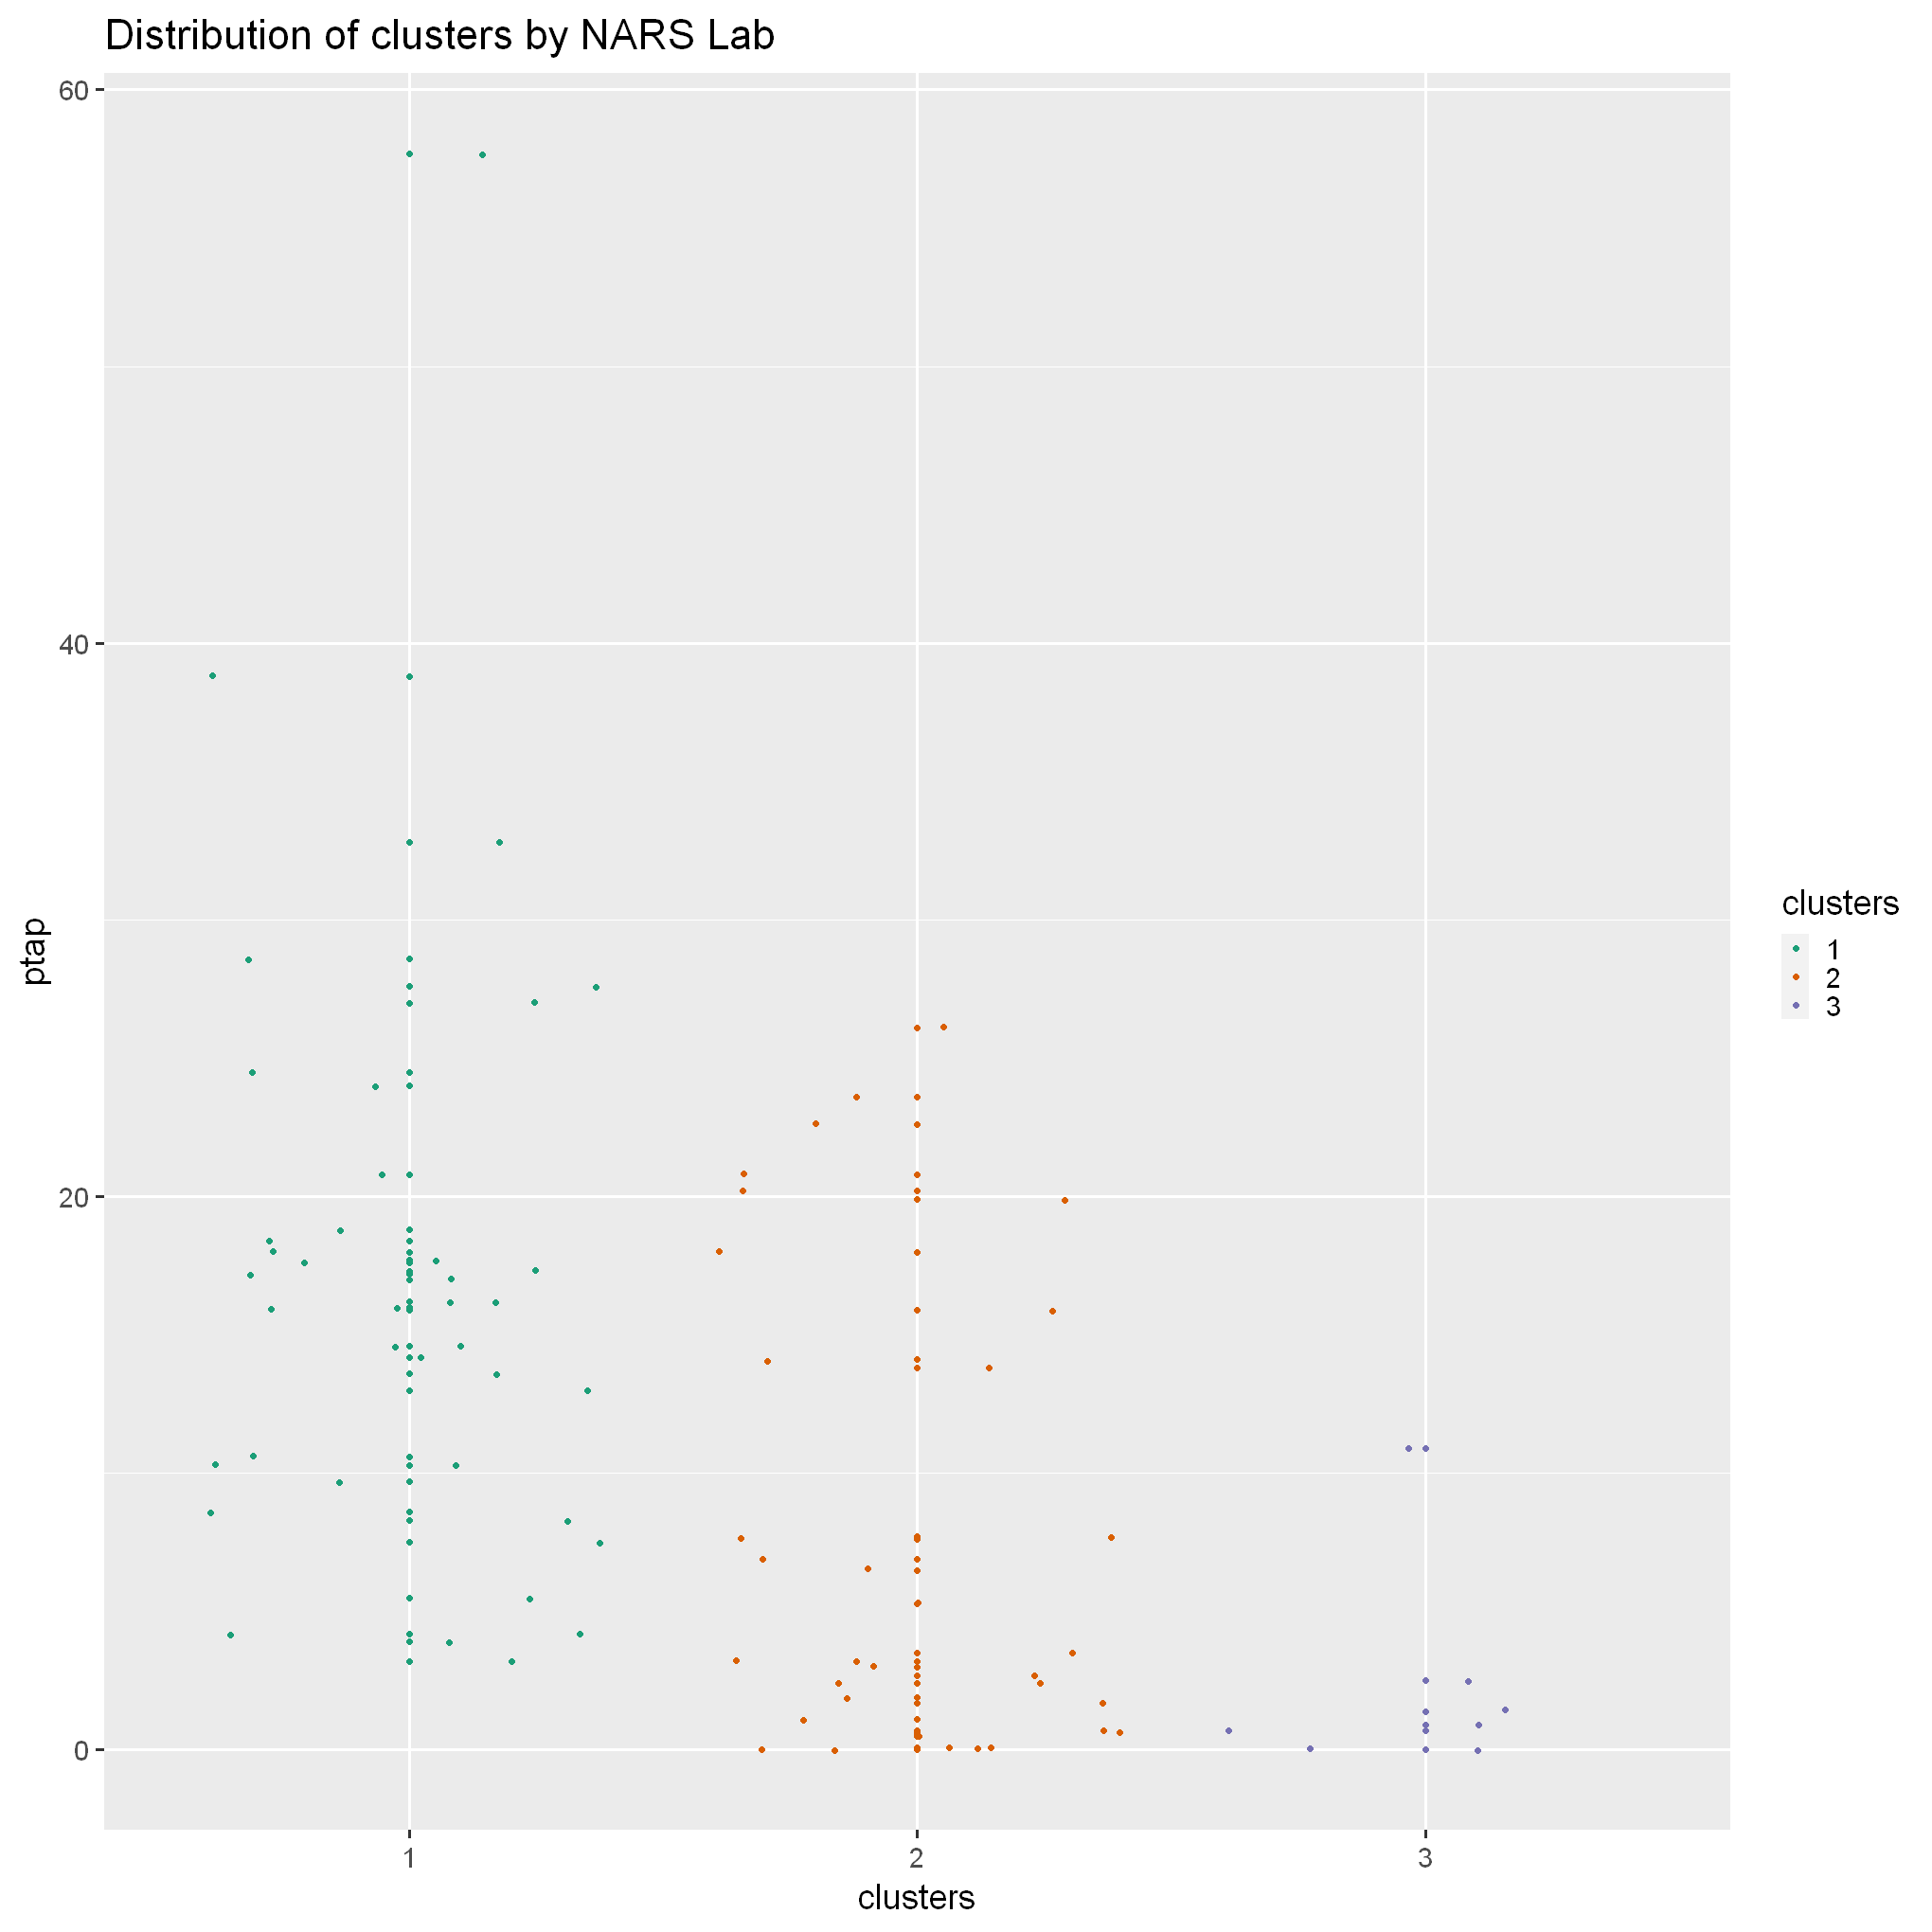

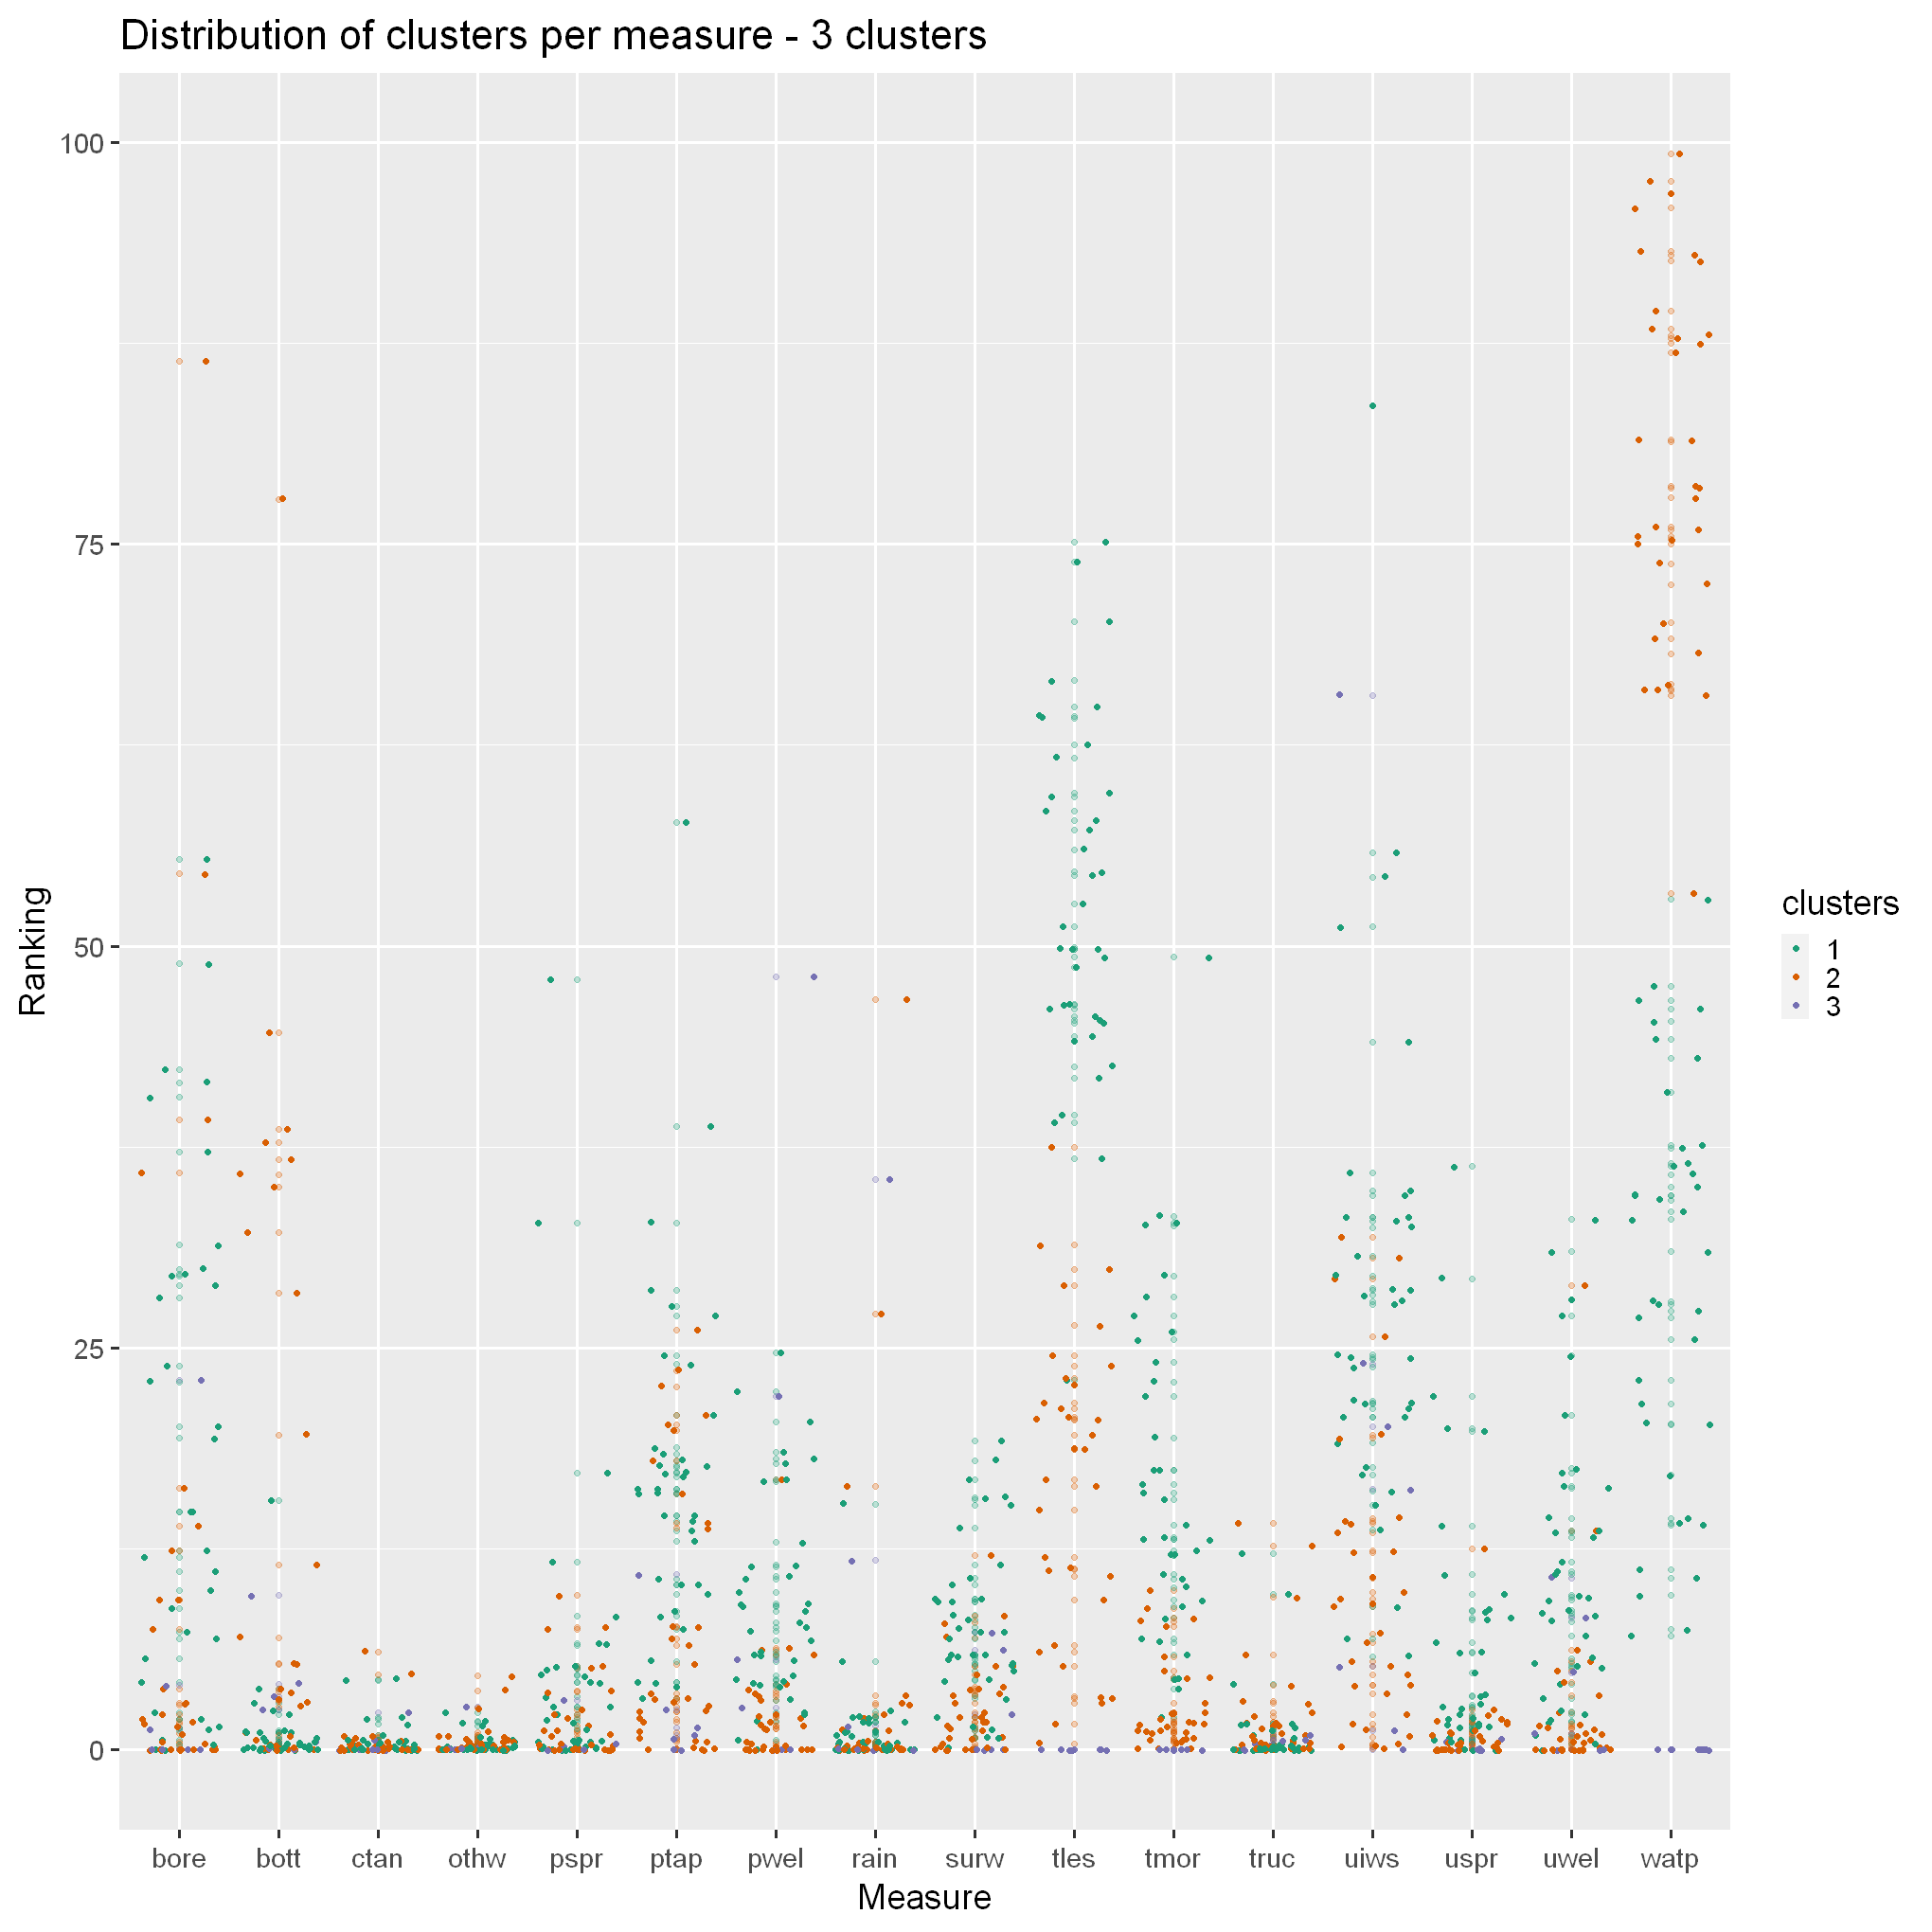

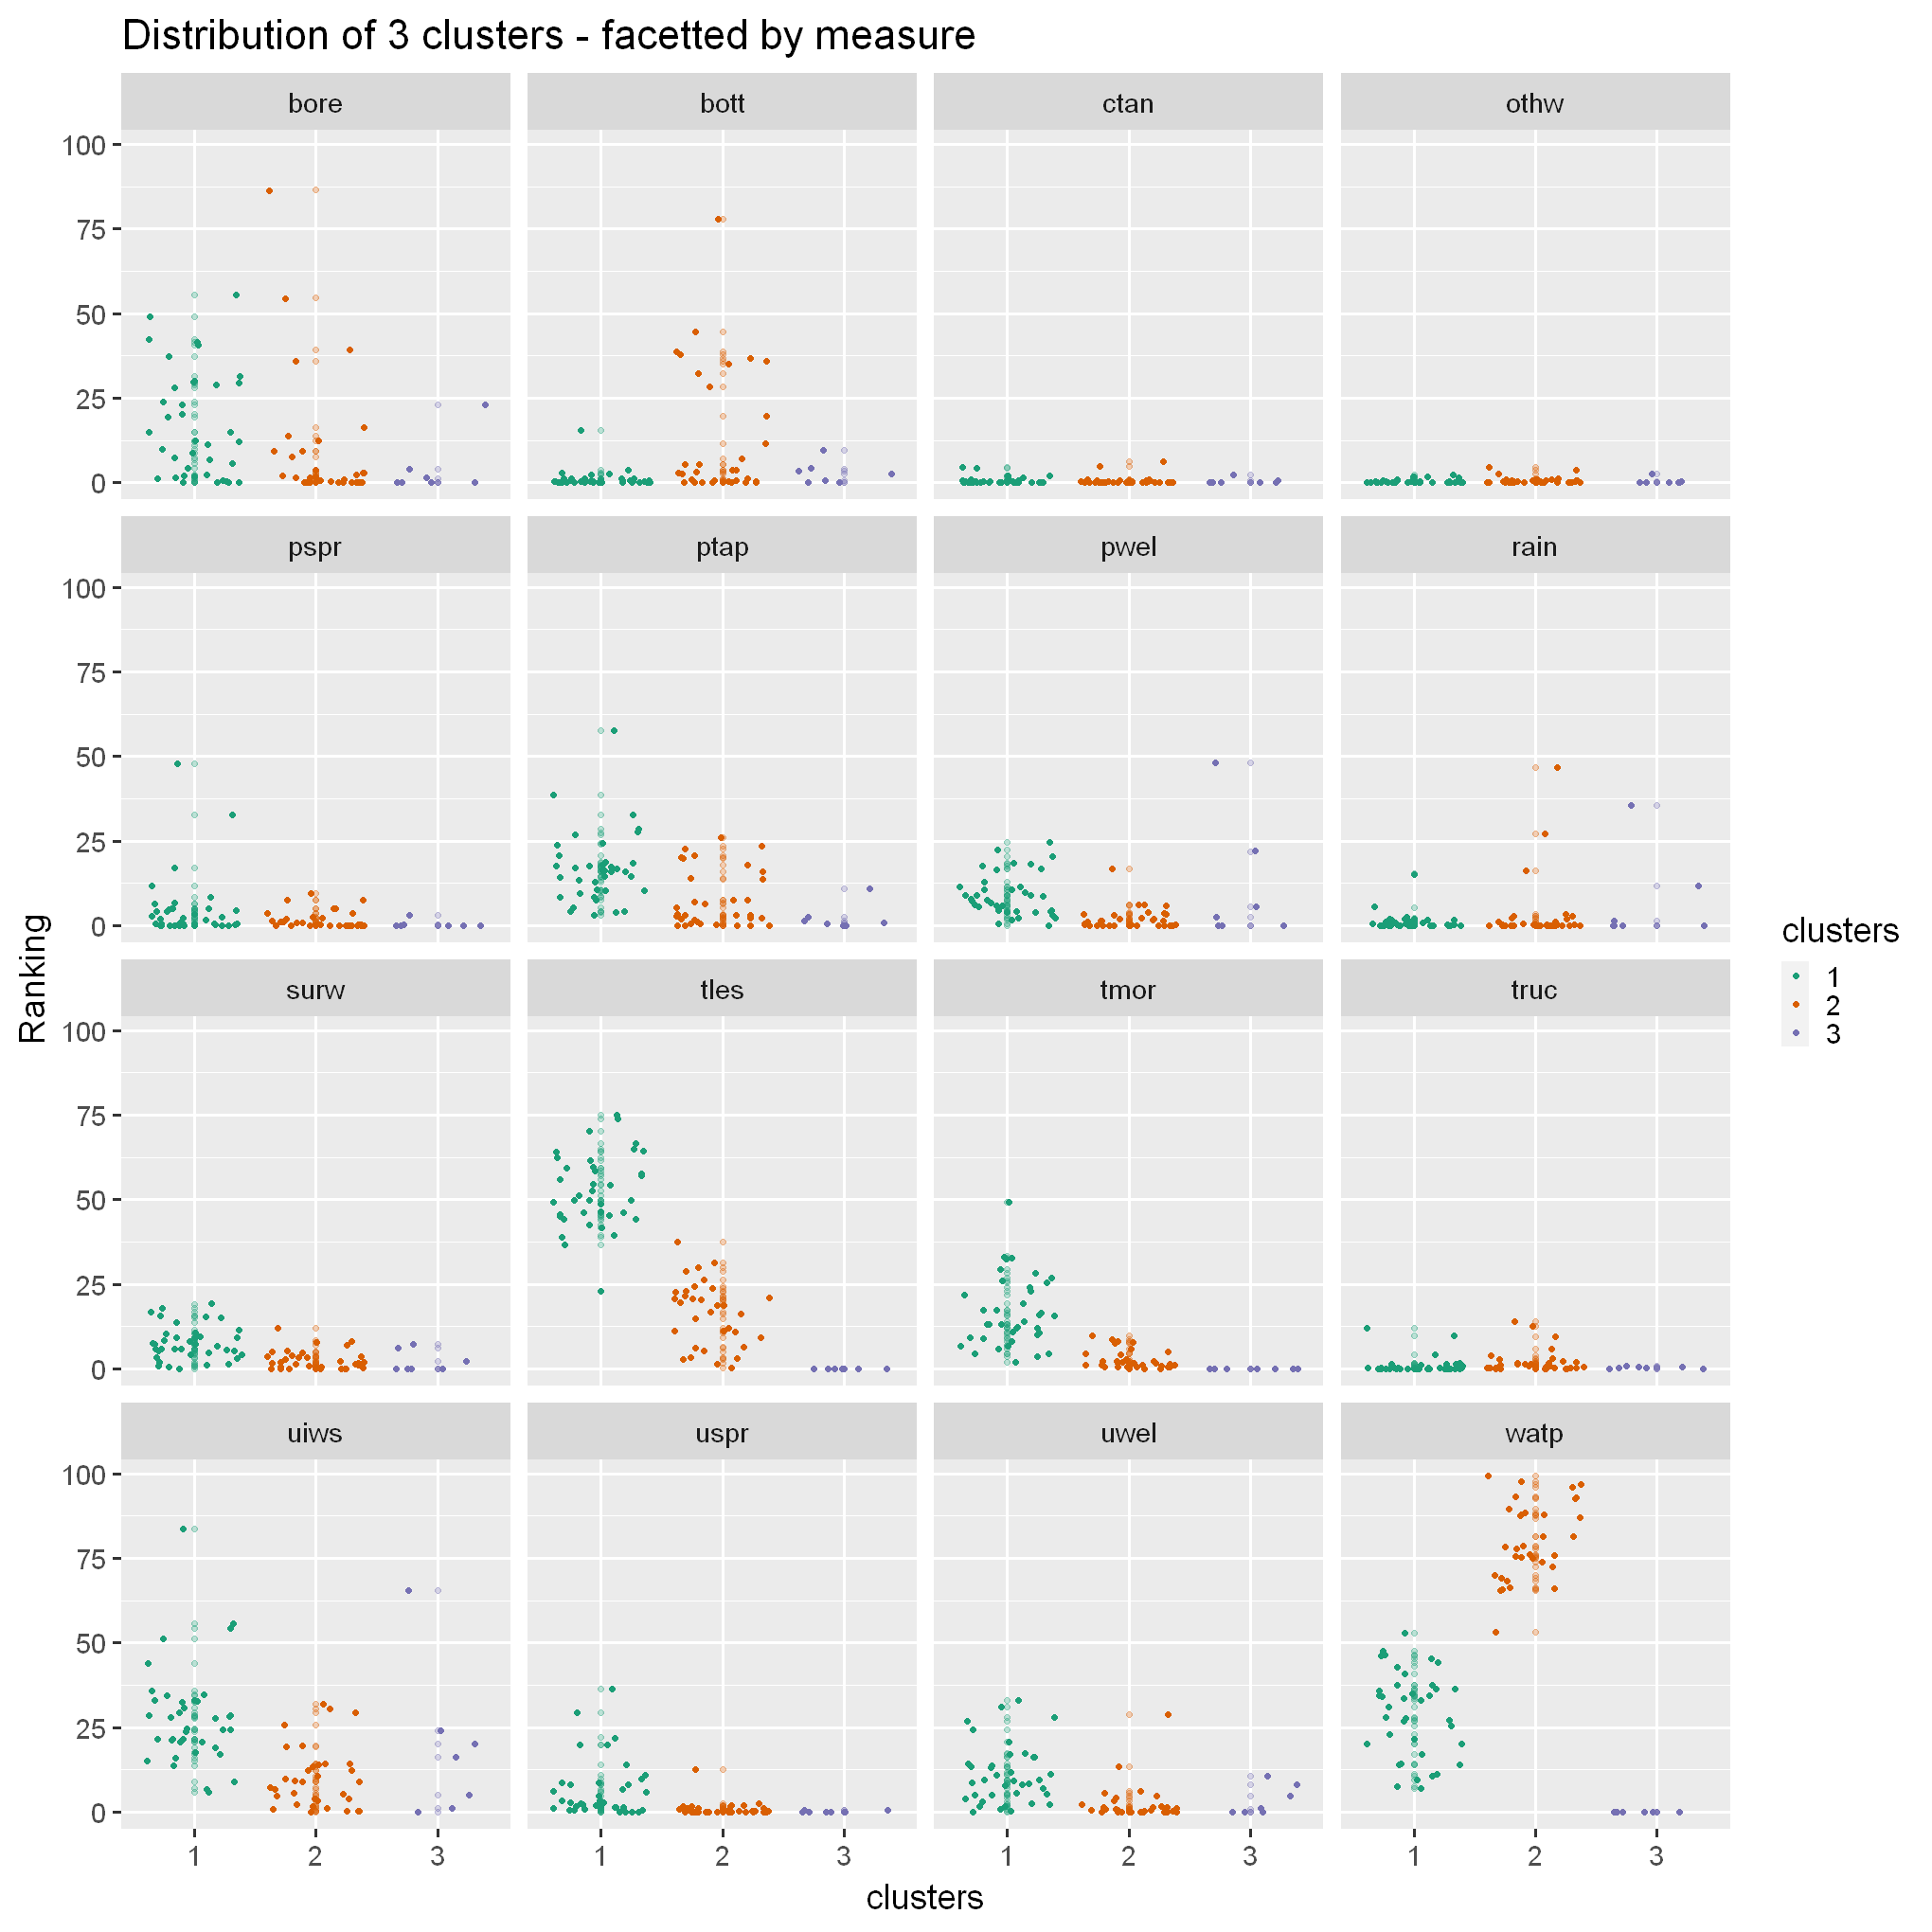

In [87]:
#data_wa$cluster <- cutree(hc.ward2,4) 
df.wa 
hc.ward2=hclust(dist(df.wa), method ="ward.D2")
df.wa$clusters <- cutree(hc.ward2,3)
df.wa$clusters <- as.factor(df.wa$clusters)

p <- ggplot(df.wa, aes(clusters, ptap, color = clusters, fill = clusters)) +
  geom_point(alpha = 0.6) +
  geom_jitter() +
  geom_point() +
  ggtitle("Distribution of clusters by NARS Lab") +
  scale_color_manual(values=c("#1b9e77","#d95f02","#7570b3")) 
p <- p + theme_grey(base_size = 22) 
p 

table(df.wa$clusters)

#Group by the cluster assignment and calculate averages
df3_clus_avg <- df.wa %>%
  group_by(clusters) %>%
  summarize_if(is.numeric, mean, na.rm=TRUE)


df3_clus_avg 

sapply(df3_clus_avg, class)
#Create a parallel coordinate plot of the values:
ggparcoord <- ggparcoord(df3_clus_avg, columns = c(2:23), 
           groupColumn = "clusters", scale = "globalminmax", order = "skewness") +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1)) + geom_point(color = "#00AFBB") 
    
#make a dot plot
countries3_gathered <- df.wa %>% gather(Measure, Ranking, ptap:watp) 

g <- ggplot(countries3_gathered, aes(Measure, Ranking, color = clusters )) +
  geom_point(alpha = 0.3) +
  geom_jitter() +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1)) +
  ggtitle("Distribution of clusters per measure - 3 clusters") 
   
g <- g + theme_grey(base_size = 22) +  scale_color_manual(values=c("#1b9e77","#d95f02","#7570b3")) 
g 
countries3_gathered %>% 

ggplot(aes(clusters, Ranking, col = clusters)) +
  geom_point(alpha = 0.3) +
  geom_jitter() +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1)) +
  ggtitle("Distribution of 3 clusters - facetted by measure") +
  facet_wrap(~Measure) +
 theme_grey(base_size = 22) +  
scale_color_manual(values=c("#1b9e77","#d95f02","#7570b3"))
# set the set factor as for the clusters


# Rank Countries

In [88]:
df = read_excel( "../../results/df-water-access.xlsx")

In [89]:
head(df) # clean df at next save (2 cluster columns - only 1 needed; etc) #df also needs to be only water accessibility variables

Country,imws,phom,pipy,ptap,bore,pwel,pspr,rain,uiws,...,ctan,bott,othw,surw,tles,tmor,watp,iwsp,basw,liws
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,71.2,2.3,4.8,14.2,20.1,18.5,4.7,0.4,28.7,...,4.4,0.2,1.7,7.3,45.2,8.2,45.3,35.4,65.3,5.0
Albania,98.4,48.8,5.2,2.4,1.4,4.1,2.5,0.0,1.6,...,0.2,19.6,0.1,0.0,20.6,1.1,77.9,77.0,97.0,0.9
Angola,66.9,4.3,9.7,10.3,1.9,9.1,3.3,1.7,33.1,...,4.3,1.2,1.8,18.0,46.1,15.6,34.5,32.6,57.0,7.5
Armenia,99.9,88.3,8.0,0.5,0.2,0.2,1.0,0.0,0.1,...,0.0,0.0,0.0,0.0,1.6,0.1,97.6,97.6,99.1,0.1
Azerbaijan,90.6,34.0,19.7,3.5,9.3,6.2,7.5,0.0,9.4,...,0.7,0.1,1.1,7.0,18.7,4.4,75.9,71.2,86.4,3.4
Bangladesh,97.8,4.3,3.3,2.7,86.4,0.2,0.0,0.4,2.2,...,0.1,0.3,0.1,1.2,22.7,1.6,75.5,75.1,96.4,1.3


In [90]:
df["norm"] <- apply(df[3:13], 1, function(x) sqrt(sum(x^2)) ) #assuming columns 5:10 are the water accessibility variables
# Ideally, df should just be the countries and the water access. variables ONLY. This, way, the code should then be:
# df["norm"] <- apply(df, 1, function(x) sqrt(sum(x^2)) )

In [91]:
df["distToCentroid"] = 0 # initialize

In [92]:
df.wa$clusters <- as.numeric(df.wa$clusters)
head(df.wa)
#Turn into numeric to find centroids

imws,phom,pipy,ptap,bore,pwel,pspr,rain,uiws,uwel,...,bott,othw,surw,tles,tmor,watp,iwsp,basw,liws,clusters
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
71.2,2.3,4.8,14.2,20.1,18.5,4.7,0.4,28.7,11.1,...,0.2,1.7,7.3,45.2,8.2,45.3,35.4,65.3,5.0,1
98.4,48.8,5.2,2.4,1.4,4.1,2.5,0.0,1.6,0.8,...,19.6,0.1,0.0,20.6,1.1,77.9,77.0,97.0,0.9,2
66.9,4.3,9.7,10.3,1.9,9.1,3.3,1.7,33.1,8.3,...,1.2,1.8,18.0,46.1,15.6,34.5,32.6,57.0,7.5,1
99.9,88.3,8.0,0.5,0.2,0.2,1.0,0.0,0.1,0.0,...,0.0,0.0,0.0,1.6,0.1,97.6,97.6,99.1,0.1,2
90.6,34.0,19.7,3.5,9.3,6.2,7.5,0.0,9.4,0.2,...,0.1,1.1,7.0,18.7,4.4,75.9,71.2,86.4,3.4,2
97.8,4.3,3.3,2.7,86.4,0.2,0.0,0.4,2.2,0.6,...,0.3,0.1,1.2,22.7,1.6,75.5,75.1,96.4,1.3,2


In [93]:
# assuming centroiddf.wa is your vector of cluster centroids

# copied this from your earlier notebook
df.wa.aggregate <- aggregate(df.wa, list(clusters=dfsimple$clusters), mean)
df.wa.aggregate <- df.wa.aggregate[,1:24]
centroiddf.wa <- apply(df.wa.aggregate, 1, function(x) sqrt(sum(x^2)) ) #How close is each country to the cen-troid of the cluster

head(centroiddf.wa)       
                       
                       
df$clusters <- dfsimple$clusters                      
head(df)

[1] 124.19578 173.28822  78.10943

Country,imws,phom,pipy,ptap,bore,pwel,pspr,rain,uiws,...,surw,tles,tmor,watp,iwsp,basw,liws,norm,distToCentroid,clusters
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,71.2,2.3,4.8,14.2,20.1,18.5,4.7,0.4,28.7,...,7.3,45.2,8.2,45.3,35.4,65.3,5.0,44.96210,0,1
Albania,98.4,48.8,5.2,2.4,1.4,4.1,2.5,0.0,1.6,...,0.0,20.6,1.1,77.9,77.0,97.0,0.9,51.39951,0,2
Angola,66.9,4.3,9.7,10.3,1.9,9.1,3.3,1.7,33.1,...,18.0,46.1,15.6,34.5,32.6,57.0,7.5,40.00625,0,1
Armenia,99.9,88.3,8.0,0.5,0.2,0.2,1.0,0.0,0.1,...,0.0,1.6,0.1,97.6,97.6,99.1,0.1,88.68196,0,2
Azerbaijan,90.6,34.0,19.7,3.5,9.3,6.2,7.5,0.0,9.4,...,7.0,18.7,4.4,75.9,71.2,86.4,3.4,43.78790,0,2
Bangladesh,97.8,4.3,3.3,2.7,86.4,0.2,0.0,0.4,2.2,...,1.2,22.7,1.6,75.5,75.1,96.4,1.3,86.64364,0,2


In [94]:
# Then here, you compute the distance to centroid cluster by cluster
df[df$clusters == 1, "distToCentroid"] = abs(df[df$clusters == 1, "norm"] - centroiddf.wa[1])
df[df$clusters == 2, "distToCentroid"] = abs(df[df$clusters == 2, "norm"] - centroiddf.wa[2])
df[df$clusters == 3, "distToCentroid"] = abs(df[df$clusters == 3, "norm"] - centroiddf.wa[3])
#df[df$clusters == 4, "distToCentroid"] = abs(df[df$clusters == 4, "norm"] - centroiddf.wa[4])
                       

head(df)
write_xlsx(df , '../../results/dfcluster-rank.xlsx')

Country,imws,phom,pipy,ptap,bore,pwel,pspr,rain,uiws,...,surw,tles,tmor,watp,iwsp,basw,liws,norm,distToCentroid,clusters
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,71.2,2.3,4.8,14.2,20.1,18.5,4.7,0.4,28.7,...,7.3,45.2,8.2,45.3,35.4,65.3,5.0,44.96210,79.23368,1
Albania,98.4,48.8,5.2,2.4,1.4,4.1,2.5,0.0,1.6,...,0.0,20.6,1.1,77.9,77.0,97.0,0.9,51.39951,121.88871,2
Angola,66.9,4.3,9.7,10.3,1.9,9.1,3.3,1.7,33.1,...,18.0,46.1,15.6,34.5,32.6,57.0,7.5,40.00625,84.18953,1
Armenia,99.9,88.3,8.0,0.5,0.2,0.2,1.0,0.0,0.1,...,0.0,1.6,0.1,97.6,97.6,99.1,0.1,88.68196,84.60626,2
Azerbaijan,90.6,34.0,19.7,3.5,9.3,6.2,7.5,0.0,9.4,...,7.0,18.7,4.4,75.9,71.2,86.4,3.4,43.78790,129.50033,2
Bangladesh,97.8,4.3,3.3,2.7,86.4,0.2,0.0,0.4,2.2,...,1.2,22.7,1.6,75.5,75.1,96.4,1.3,86.64364,86.64459,2


In [95]:
# You can then sort each subset by the size of "distToCentroid"
df %>% 
  arrange_at("Country", desc) %>%
  arrange_at("distToCentroid") %>%
  select(1, 25, 26)

Country,distToCentroid,clusters
<chr>,<dbl>,<dbl>
Brazil,4.782146,3
Vietnam,8.387980,3
Morocco,14.361407,3
Ukraine,17.341507,3
Moldova,20.722407,3
Cambodia,31.008789,3
Central African Republic,39.313448,1
Congo Democratic Republic,57.775299,1
Madagascar,58.784235,1


In [96]:
#Cluster 1
df %>%
  filter(clusters == 1) %>%
  select(Country) %>%
  head(7)

Country
<chr>
Afghanistan
Angola
Benin
Burkina Faso
Burundi
Cameroon
Central African Republic


In [97]:
#Cluster 2
df %>%
  filter(clusters == 2) %>%
  select(Country) %>%
  head(7)

Country
<chr>
Albania
Armenia
Azerbaijan
Bangladesh
Bolivia
Colombia
Comoros


In [98]:
#Cluster 3
df %>%
  filter(clusters == 3) %>%
  select(Country) %>%
  head(7)

Country
<chr>
Brazil
Cambodia
Moldova
Morocco
Paraguay
Ukraine
Vietnam


#Cluster 4
df %>%
  filter(clusters == 4) %>%
  select(Country) %>%
  head(7)

In [99]:
# You can then sort each subset by the size of "distToCentroid"
df1 = df %>% 
  arrange_at("Country", desc) %>%
   arrange_at("distToCentroid") %>%
    arrange_at("clusters") %>%
  select(1, 25, 26)



In [100]:
head(df1)
cluster.one <- subset(df1, clusters == 1 )
cluster.two <- subset(df1, clusters == 2 )
cluster.three <- subset(df1, clusters == 3 )
#cluster.four <- subset(df1, clusters == 4 )
head(cluster.one)
summary(cluster.one)

Country,distToCentroid,clusters
<chr>,<dbl>,<dbl>
Central African Republic,39.31345,1
Congo Democratic Republic,57.77530,1
Madagascar,58.78423,1
Papua New Guinea,58.87365,1
Chad,59.40867,1
Sao Tome and Principe,60.03473,1


Country,distToCentroid,clusters
<chr>,<dbl>,<dbl>
Central African Republic,39.31345,1
Congo Democratic Republic,57.77530,1
Madagascar,58.78423,1
Papua New Guinea,58.87365,1
Chad,59.40867,1
Sao Tome and Principe,60.03473,1


   Country          distToCentroid     clusters
 Length:38          Min.   :39.31   Min.   :1  
 Class :character   1st Qu.:68.44   1st Qu.:1  
 Mode  :character   Median :74.48   Median :1  
                    Mean   :73.30   Mean   :1  
                    3rd Qu.:78.87   3rd Qu.:1  
                    Max.   :97.82   Max.   :1  

In [101]:
cluster.one %>% 
  arrange_at("Country", desc) %>%
   arrange_at("distToCentroid") %>%
    arrange_at("clusters") %>%
  select(1:3)
cluster.two %>% 
  arrange_at("Country", desc) %>%
   arrange_at("distToCentroid") %>%
    arrange_at("clusters") %>%
  select(1:3)
cluster.three %>% 
  arrange_at("Country", desc) %>%
   arrange_at("distToCentroid") %>%
    arrange_at("clusters") %>%
  select(1:3)
# cluster.four %>% 
#  arrange_at("Country", desc) %>%
#   arrange_at("distToCentroid") %>%
#    arrange_at("clusters") %>%
#  select(1:3)

Country,distToCentroid,clusters
<chr>,<dbl>,<dbl>
Central African Republic,39.31345,1
Congo Democratic Republic,57.77530,1
Madagascar,58.78423,1
Papua New Guinea,58.87365,1
Chad,59.40867,1
Sao Tome and Principe,60.03473,1
Malawi,64.21511,1
Burundi,66.62556,1
Niger,66.69126,1


Country,distToCentroid,clusters
<chr>,<dbl>,<dbl>
Egypt,82.61805,2
Armenia,84.60626,2
Bangladesh,86.64459,2
Colombia,92.01375,2
Peru,100.00275,2
Kazakhstan,107.15790,2
Uzbekistan,107.94467,2
Bolivia,112.00552,2
Pakistan,114.51450,2


Country,distToCentroid,clusters
<chr>,<dbl>,<dbl>
Brazil,4.782146,3
Vietnam,8.387980,3
Morocco,14.361407,3
Ukraine,17.341507,3
Moldova,20.722407,3
Cambodia,31.008789,3
Paraguay,78.109426,3


# World Map

In [102]:
df = read_excel('../../results/dfcluster-rank.xlsx') #change name of file to sth descriptive (e.g. country-clusters)
head(df)

Country,imws,phom,pipy,ptap,bore,pwel,pspr,rain,uiws,...,surw,tles,tmor,watp,iwsp,basw,liws,norm,distToCentroid,clusters
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,71.2,2.3,4.8,14.2,20.1,18.5,4.7,0.4,28.7,...,7.3,45.2,8.2,45.3,35.4,65.3,5.0,44.96210,79.23368,1
Albania,98.4,48.8,5.2,2.4,1.4,4.1,2.5,0.0,1.6,...,0.0,20.6,1.1,77.9,77.0,97.0,0.9,51.39951,121.88871,2
Angola,66.9,4.3,9.7,10.3,1.9,9.1,3.3,1.7,33.1,...,18.0,46.1,15.6,34.5,32.6,57.0,7.5,40.00625,84.18953,1
Armenia,99.9,88.3,8.0,0.5,0.2,0.2,1.0,0.0,0.1,...,0.0,1.6,0.1,97.6,97.6,99.1,0.1,88.68196,84.60626,2
Azerbaijan,90.6,34.0,19.7,3.5,9.3,6.2,7.5,0.0,9.4,...,7.0,18.7,4.4,75.9,71.2,86.4,3.4,43.78790,129.50033,2
Bangladesh,97.8,4.3,3.3,2.7,86.4,0.2,0.0,0.4,2.2,...,1.2,22.7,1.6,75.5,75.1,96.4,1.3,86.64364,86.64459,2


In [103]:
df = df[, c(1,26)] # select only country name and cluster number
head(df)

Country,clusters
<chr>,<dbl>
Afghanistan,1
Albania,2
Angola,1
Armenia,2
Azerbaijan,2
Bangladesh,2


In [104]:
colnames(df) = c('region', 'value') # change column names for ggplot
dim(df)
head(df)

[1] 78  2

region,value
<chr>,<dbl>
Afghanistan,1
Albania,2
Angola,1
Armenia,2
Azerbaijan,2
Bangladesh,2


In [105]:
# This is to convert country names in df to match those in the worldMap dataframe
coords <- joinCountryData2Map(df, joinCode = "NAME", nameJoinColumn = "region")
coords = data.frame(coords)
colnames(coords) = tolower(colnames(coords))
colnames(coords)
coords = drop_na(coords, value)
coords$name

76 codes from your data successfully matched countries in the map
2 codes from your data failed to match with a country code in the map
167 codes from the map weren't represented in your data


[1] "scalerank"    "labelrank"    "featurecla"   "sovereignt"   "sov_a3"      
 [6] "adm0_dif"     "level"        "type"         "admin"        "adm0_a3"     
[11] "geou_dif"     "geounit"      "gu_a3"        "su_dif"       "subunit"     
[16] "su_a3"        "name"         "abbrev"       "postal"       "name_forma"  
[21] "terr_"        "name_sort"    "map_color"    "pop_est"      "gdp_md_est"  
[26] "fips_10_"     "iso_a2"       "iso_a3"       "iso_n3"       "iso3"        
[31] "lon"          "lat"          "iso3.1"       "admin.1"      "region"      
[36] "continent"    "geo3major"    "geo3"         "image24"      "glocaf"      
[41] "stern"        "sresmajor"    "sres"         "gbd"          "avoidnumeric"
[46] "avoidname"    "ldc"          "sid"          "lldc"         "region"      
[51] "value"        "admin.2"      "iso3.2"

[1] Afghanistan           Angola                Albania              
 [4] Armenia               Azerbaijan            Burundi              
 [7] Benin                 Burkina Faso          Bangladesh           
[10] Bolivia               Brazil                Central African Rep. 
[13] Ivory Coast           Cameroon              Congo (Brazzaville)  
[16] Colombia              Dominican Rep.        Egypt                
[19] Eritrea               Ethiopia              Gabon                
[22] Ghana                 Guinea                Gambia               
[25] Guatemala             Guyana                Honduras             
[28] Haiti                 Indonesia             India                
[31] Jordan                Kazakhstan            Kenya                
[34] Kyrgyzstan            Cambodia              Liberia              
[37] Lesotho               Morocco               Moldova              
[40] Madagascar            Mali                  Myanmar              
[43] Mozambique            Mauritania            Malawi               
[46] Namibia               Niger                 Nigeria              
[49] Nicaragua             Nepal                 Pakistan             
[52] Peru                  Philippines           Papua New Guinea     
[55] Paraguay              Rwanda                Senegal              
[58] Sierra Leone          Chad                  Togo                 
[61] Tajikistan            Turkmenistan          East Timor           
[64] Turkey                Tanzania              Uganda               
[67] Ukraine               Uzbekistan            Vietnam              
[70] Yemen                 South Africa          Zambia               
[73] Zimbabwe              Comoros               Maldives             
[76] Sao Tome and Principe
243 Levels: Afghanistan Aland Albania Algeria American Samoa Andorra ... Zimbabwe

In [106]:
setdiff(df$region,coords$name)

[1] "Central African Republic"  "Congo"                    
[3] "Congo Democratic Republic" "Cote d'Ivoire"            
[5] "Dominican Republic"        "Eswatini"                 
[7] "Kyrgyz Republic"           "Timor-Leste"

In [107]:
# Correct the country names in DF
df[df=='Timor-Leste'] = "East Timor"
df[df=='Central African Republic'] = "Central African Rep."
df[df=='Cote d\'Ivoire'] = "Ivory Coast"
df[df=='Dominican Republic'] = "Dominican Rep."
df[df=='Kyrgyz Republic'] = "Kyrgyzstan"
df[df=='Eswatini'] = "Swaziland"
df[df=='Congo'] = "Congo (Brazzaville)"
df[df=='Congo Democratic Republic'] = "Congo (Kinshasa)"

In [108]:
# Get world map data (lat/long)
countrynames = df$region
worldMap <- getMap()
country_indices <- which(worldMap$NAME%in%countrynames)

In [109]:
# Get coordinates for all countries to plot base map
allCoords <- lapply(seq(1,243), function(i){
  dfn <- data.frame(worldMap@polygons[[i]]@Polygons[[1]]@coords)
  dfn$region =as.character(worldMap$NAME[i])
  colnames(dfn) <- list("long", "lat", "region")
  return(dfn)
})
allCoords <- do.call("rbind", allCoords)


In [110]:
# Get coordinates strictly for those in water accessibility dataset
waterCoords <- lapply(country_indices, function(i){
  dfn <- data.frame(worldMap@polygons[[i]]@Polygons[[1]]@coords)
  dfn$region =as.character(worldMap$NAME[i])
  colnames(dfn) <- list("long", "lat", "region")
  return(dfn)
})

waterCoords <- do.call("rbind", waterCoords)
waterCoords$value <- df$value[match(waterCoords$region,df$region)]
waterCoords$value <- factor(waterCoords$value)

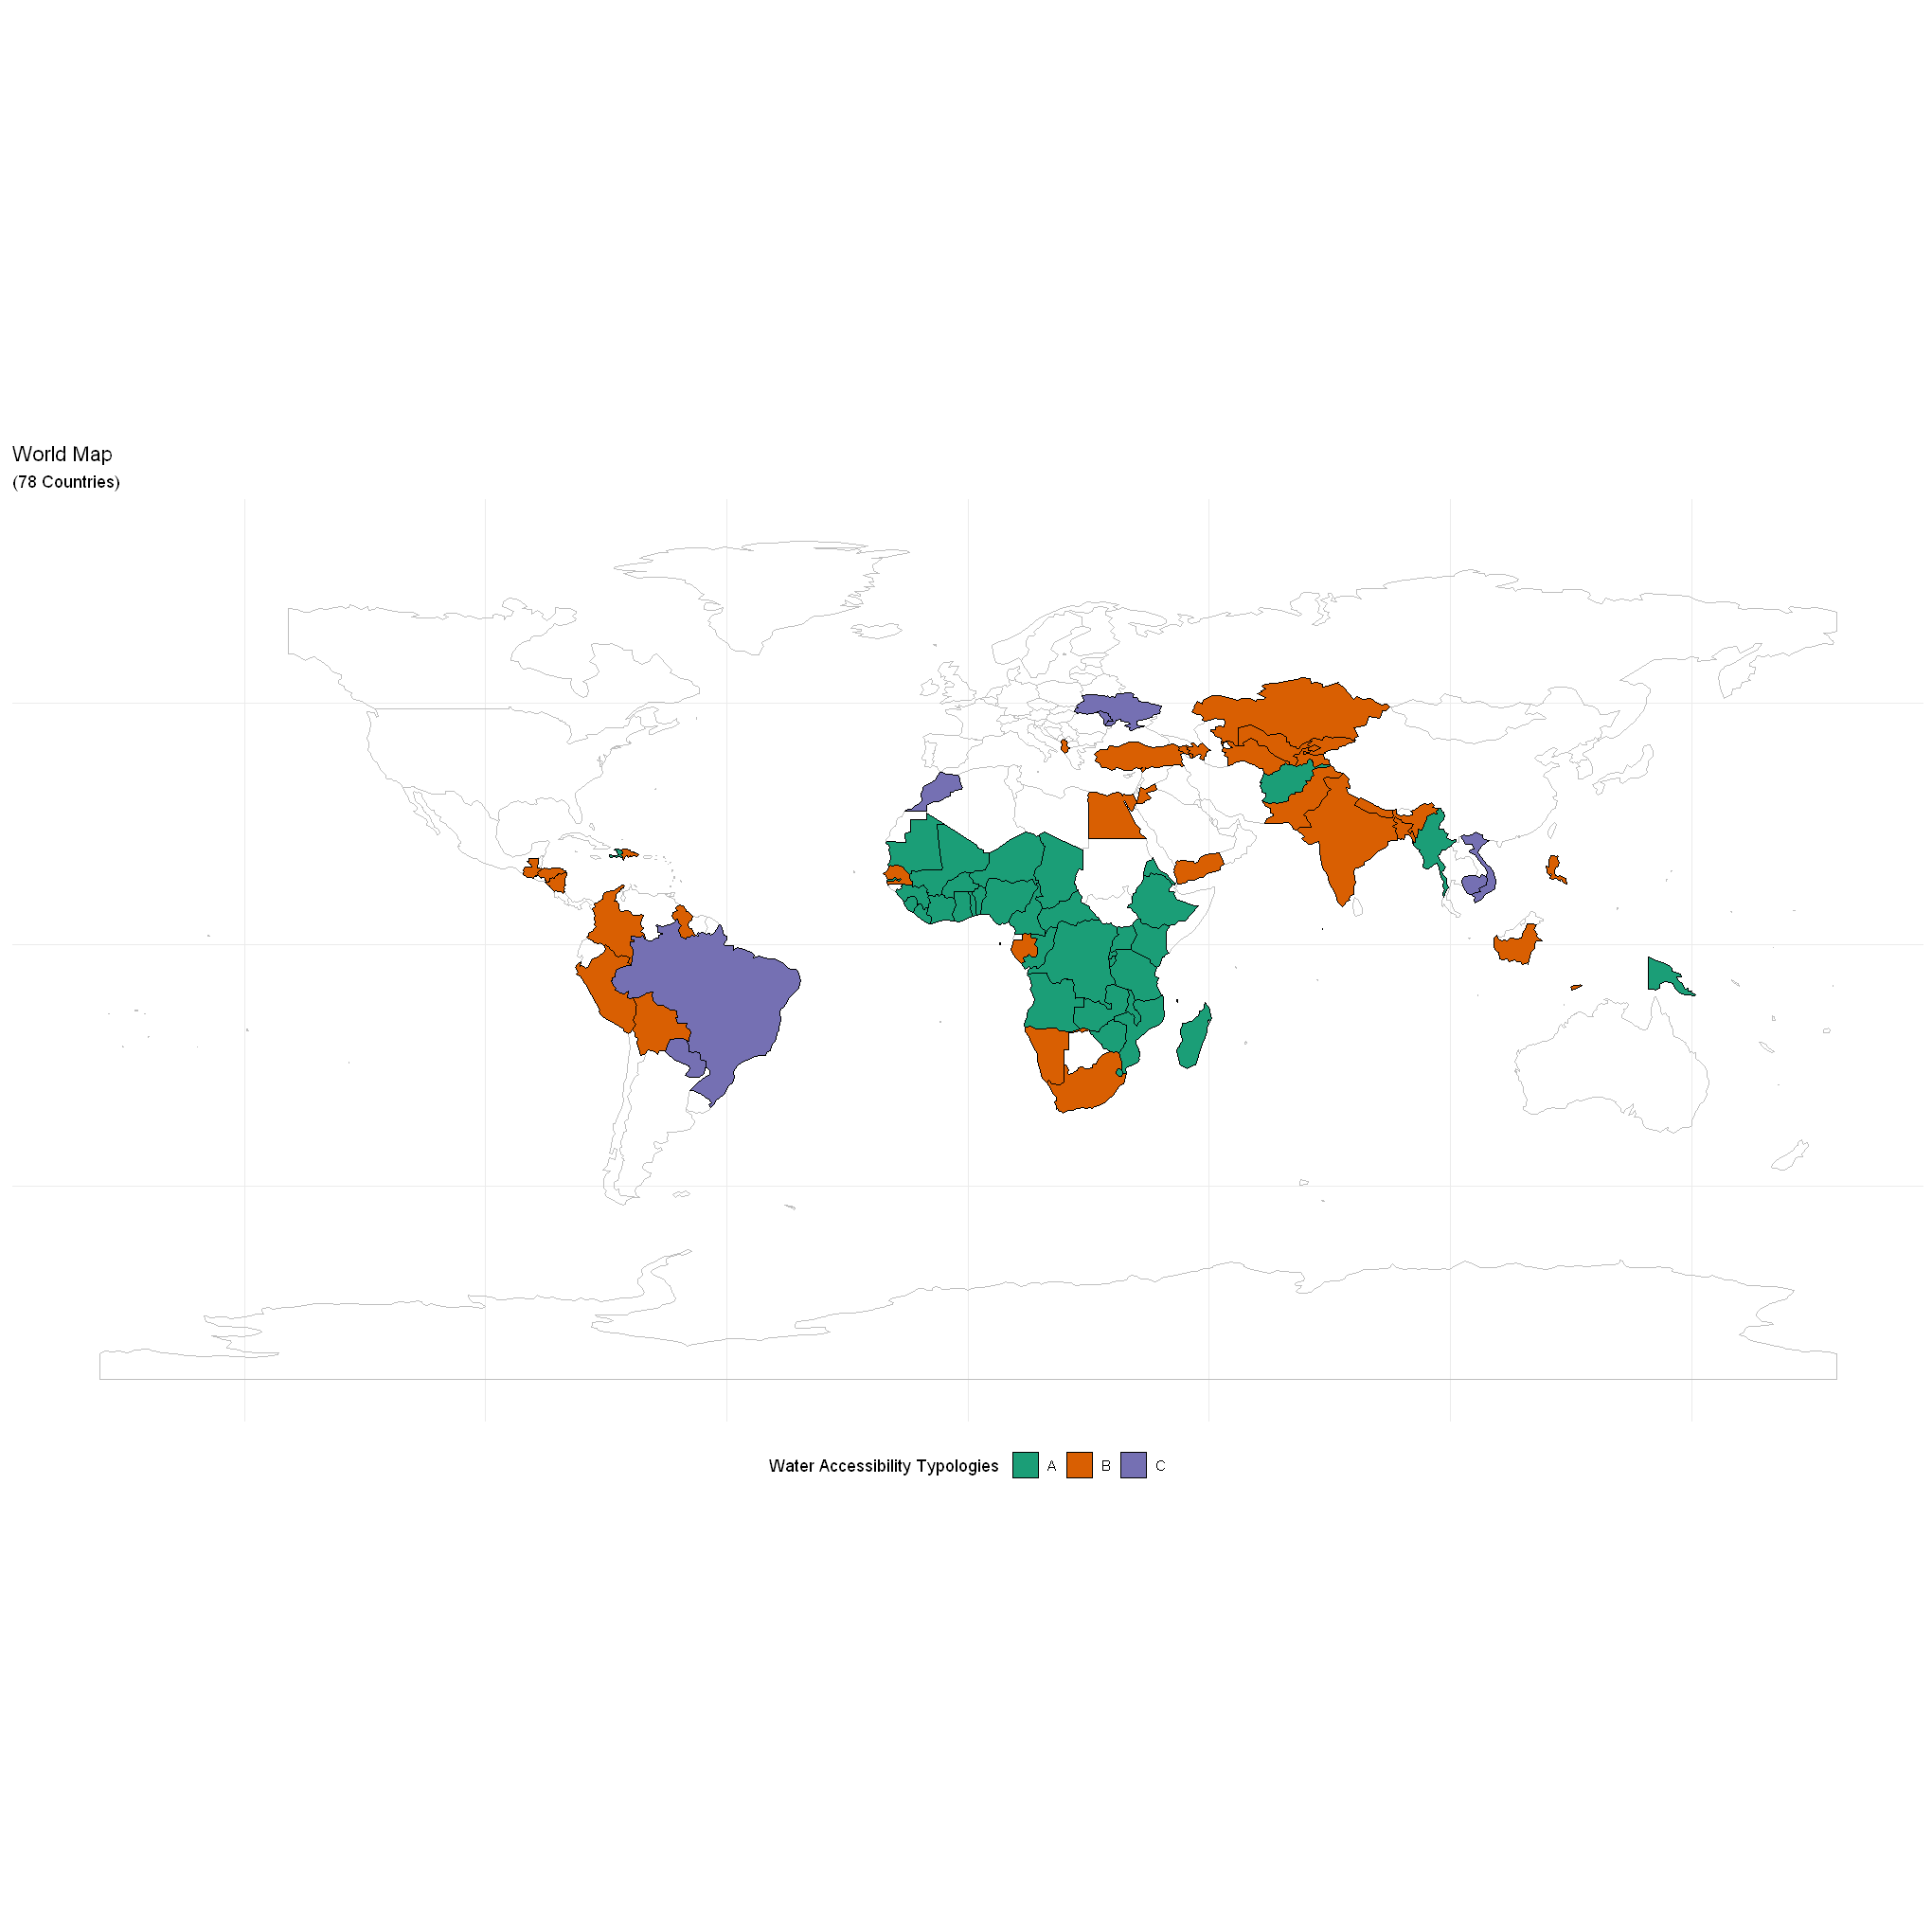

In [111]:
# Plot
options(repr.plot.width=17, repr.plot.height=17)
par(mar = c(1,1,1,1))
par(cex=1)
ggplot() +
    geom_sf(color = "black", fill= 'antiquewhite') +
    xlab("Longitude") + ylab("Latitude") +
    geom_polygon(data= allCoords, mapping = aes(x =long, y=lat,group = region),color="grey",fill=NA) + 
    geom_polygon( data = waterCoords, mapping = aes(x =long, y=lat,group = region, fill=value), size=.3,color="black") +
    expand_limits(x = waterCoords$long, y = waterCoords$lat)  + 
    scale_fill_brewer(palette='Dark2', name="Water Accessibility Typologies", na.value="grey", labels = c("A", "B", "C")) +  #labels = c())+
    ggtitle("World Map", subtitle = paste0("(", length(unique(df$region)), " Countries)")) +
    theme_minimal() +
    theme(legend.position = "bottom",
        axis.ticks = element_blank(), 
        axis.title = element_blank(), 
        axis.text =  element_blank()) 
#     #guides(fill = guide_colorbar(barwidth = 10, barheight = .5))


#Ref: https://egallic.fr/en/european-map-using-r/